# Project 4 OpenClassroom

SEA Building Energy Benchmarking
Explore Open Data from the City of Seattle
https://www.kaggle.com/city-of-seattle/sea-building-energy-benchmarking#2015-building-energy-benchmarking.csv

https://data.seattle.gov/dataset/2015-Building-Energy-Benchmarking/h7rm-fz6m
https://data.seattle.gov/dataset/2016-Building-Energy-Benchmarking/2bpz-gwpy

In [1]:
## To display the graphs within the code and not in another windows 
import sys
print("Python Version :"+str(sys.version_info))
%matplotlib inline
#To be able to use CSV
import csv
print("CSV Version :"+csv.__version__)
# To be able to use Numpy
import numpy as np
print("Numpy Version :"+np.__version__)
# To be able to use Pandas
import pandas as pd
print("Pandas Version :"+pd.__version__)
# To be able to use Maplotlib
import matplotlib.pyplot as plt

# To be able to use Seaborn
import seaborn as sns
print("Seaborn Version :"+sns.__version__)

# To be able to use Warning
import warnings

import string


# To be able to use WorldCloud
from wordcloud import WordCloud, STOPWORDS 

Python Version :sys.version_info(major=3, minor=7, micro=6, releaselevel='final', serial=0)
CSV Version :1.0
Numpy Version :1.18.1
Pandas Version :1.0.1
Seaborn Version :0.10.0


### Init of the main variables

In [2]:
#Disable the warnings "ignore"
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
text_data=['ENERGYSTARScore','BuildingType','PrimaryPropertyType','Neighborhood','LargestPropertyUseType','SecondLargestPropertyUseType','ThirdLargestPropertyUseType','ComplianceStatus']
numeric_data=['Latitude','Longitude','YearBuilt','NumberofBuildings','NumberofFloors']

In [3]:
input_data2015 = pd.read_csv('2015-building-energy-benchmarking.csv', sep=",", header=0)
input_data2016 = pd.read_csv('2016-building-energy-benchmarking.csv', sep=",", header=0)

In [4]:
input_data2015

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'latitude': '47.61219025', 'longitude': '-122...",7,DOWNTOWN,1927,1,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,0.0,249.43,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,"{'latitude': '47.61310583', 'longitude': '-122...",7,DOWNTOWN,1996,1,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,51.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,0.0,263.51,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,"{'latitude': '47.61334897', 'longitude': '-122...",7,DOWNTOWN,1969,1,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.0,Parking,100000.0,Swimming Pool,0.0,NaN,18.0,96.6,99.7,242.7,246.5,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,0.0,2061.48,1.92,Yes,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,18081
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,"{'latitude': '47.61421585', 'longitude': '-122...",7,DOWNTOWN,1926,1,10.0,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,1.0,460.4,462.5,636.3,643.2,28229320.0,28363444.0,23458518.0,811521.0,2769023.0,20019.0,2001894.0,0.0,1936.34,31.38,No,NaN,Compliant,High Outlier,NaN,56.0,NaN,31.0,18081
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,"{'latitude': '47.6137544', 'longitude': '-122....",7,DOWNTOWN,1980,1,18.0,119890,12460,107430,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,67.0,120.1,122.1,228.8,227.1,14829099.0,15078243.0,0.0,1777841.0,6066245.0,87631.0,8763105.0,0.0,507.70,4.02,No,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,19576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3335,50049,2015,Multifamily LR (1-4),Low-Rise Multifamily,PACIFIC CENTER CONDOMINIUM,6599950000,"{'latitude': '47.59950256', 'longitude': '-122...",2,DOWNTOWN,2000,1,4.0,44650,0,44650,Multifamily Housing,Multifamily Housing,44650.0,NaN,NaN,NaN,NaN,NaN,71.0,25.6,27.8,80.4,87.2,1142949.0,1240429.0,0.0,334979.0,1142996.0,0.0,0.0,0.0,7.97,0.07,No,NaN,Compliant,NaN,NaN,26.0,NaN,16.0,18379
3336,50055,2015,Multifamily MR (5-9),Mid-Rise Multifamily,IDENTITY APTS 4123,1142001670,"{'latitude': '47.65752471', 'longitude': '-122...",4,NORTHEAST,2014,1,7.0,42393,0,42393,Multifamily Housing,Multifamily Housing,31748.0,NaN,NaN,NaN,NaN,NaN,98.0,48.6,55.1,124.2,144.7,1543282.0,1750143.0,0.0,325705.0,1111352.0,4320.0,431976.0,0.0,30.69,0.61,No,NaN,Compliant,NaN,NaN,60.0,NaN,38.0,18383
3337,50057,2015,Multifamily HR (10+),High-Rise Multifamily,CIRRUS,660000575,"{'latitude': '47.61649845', 'longitude': '-122...",7,DOWNTOWN,2015,1,40.0,319481,41915,277566,"Multifamily Housing, Parking",NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
input_data2016

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7.226362e+06,7.456910e+06,2003882.00,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8.387933e+06,8.664479e+06,0.00,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,7.258702e+07,7.393711e+07,21566554.00,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6.794584e+06,6.946800e+06,2214446.25,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,1.417261e+07,1.465650e+07,0.00,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,False,NaN,Compliant,NaN,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,NaN,1624049080,2,GREATER DUWAMISH,47.56722,-122.31154,1990,1.0,1,12294,0,12294,Office,Office,12294.0,NaN,NaN,NaN,NaN,NaN,46.0,69.099998,76.699997,161.699997,176.100006,8.497457e+05,9.430032e+05,0.00,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,True,NaN,Error - Correct Default Data,NaN,20.94,1.70
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,NaN,3558300000,2,DOWNTOWN,47.59625,-122.32283,2004,1.0,1,16000,0,16000,Other - Recreation,Other - Recreation,16000.0,NaN,NaN,NaN,NaN,NaN,NaN,59.400002,65.900002,114.199997,118.900001,9.502762e+05,1.053706e+06,0.00,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,False,NaN,Compliant,NaN,32.17,2.01
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,NaN,1794501150,7,MAGNOLIA / QUEEN ANNE,47.63644,-122.35784,1974,1.0,1,13157,0,13157,"Fitness Center/Health Club/Gym, Other - Recrea...",Other - Recreation,7583.0,Fitness Center/Health Club/Gym,5574.0,Swimmin

### Display of some statistics on the original dataset
###### Print the number of lines and the number of columns

###### Print the columns name

In [6]:
print("Columns name 2015 " + input_data2015.columns.values)
print("\n")
print("Columns name 2016 " + input_data2015.columns.values)

['Columns name 2015 OSEBuildingID' 'Columns name 2015 DataYear'
 'Columns name 2015 BuildingType' 'Columns name 2015 PrimaryPropertyType'
 'Columns name 2015 PropertyName'
 'Columns name 2015 TaxParcelIdentificationNumber'
 'Columns name 2015 Location' 'Columns name 2015 CouncilDistrictCode'
 'Columns name 2015 Neighborhood' 'Columns name 2015 YearBuilt'
 'Columns name 2015 NumberofBuildings' 'Columns name 2015 NumberofFloors'
 'Columns name 2015 PropertyGFATotal'
 'Columns name 2015 PropertyGFAParking'
 'Columns name 2015 PropertyGFABuilding(s)'
 'Columns name 2015 ListOfAllPropertyUseTypes'
 'Columns name 2015 LargestPropertyUseType'
 'Columns name 2015 LargestPropertyUseTypeGFA'
 'Columns name 2015 SecondLargestPropertyUseType'
 'Columns name 2015 SecondLargestPropertyUseTypeGFA'
 'Columns name 2015 ThirdLargestPropertyUseType'
 'Columns name 2015 ThirdLargestPropertyUseTypeGFA'
 'Columns name 2015 YearsENERGYSTARCertified'
 'Columns name 2015 ENERGYSTARScore' 'Columns name 2015 Sit

### Print the differences among the two columns names

###### Print the column names that are only in 2015

In [7]:
print(list(set(input_data2015.columns.values).difference(input_data2016.columns.values)))

['2010 Census Tracts', 'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)', 'Location', 'Comment', 'Zip Codes', 'OtherFuelUse(kBtu)', 'SPD Beats', 'Seattle Police Department Micro Community Policing Plan Areas', 'City Council Districts']


###### Print the column names that are only in 2016

In [8]:
print(list(set(input_data2016.columns.values).difference(input_data2015.columns.values)))

['Comments', 'State', 'Latitude', 'TotalGHGEmissions', 'GHGEmissionsIntensity', 'Longitude', 'Address', 'City', 'ZipCode']


###### Rename the column names

In [9]:
input_data2015.rename(columns={"Comment": "Comments", "Zip Codes": "ZipCode","GHGEmissions(MetricTonsCO2e)":"TotalGHGEmissions","GHGEmissionsIntensity(kgCO2e/ft2)":"GHGEmissionsIntensity"}, inplace=True)

In [10]:
print(list(set(input_data2016.columns.values).difference(input_data2015.columns.values)))

['State', 'Longitude', 'Address', 'City', 'Latitude']


In [11]:
import ast
input_data2015['Latitude'] = input_data2015['Location'].apply(lambda x: ast.literal_eval(x).get('latitude'))
input_data2015['Longitude'] = input_data2015['Location'].apply(lambda x: ast.literal_eval(x).get('longitude'))

In [12]:
input_data2015

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,DefaultData,Comments,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,ZipCode,Latitude,Longitude
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'latitude': '47.61219025', 'longitude': '-122...",7,DOWNTOWN,1927,1,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,0.0,249.43,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081,47.61219025,-122.33799744
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,"{'latitude': '47.61310583', 'longitude': '-122...",7,DOWNTOWN,1996,1,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,51.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,0.0,263.51,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081,47.61310583,-122.33335756
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,"{'latitude': '47.61334897', 'longitude': '-122...",7,DOWNTOWN,1969,1,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.0,Parking,100000.0,Swimming Pool,0.0,NaN,18.0,96.6,99.7,242.7,246.5,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,0.0,2061.48,1.92,Yes,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,18081,47.61334897,-122.33769944
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,"{'latitude': '47.61421585', 'longitude': '-122...",7,DOWNTOWN,1926,1,10.0,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,1.0,460.4,462.5,636.3,643.2,28229320.0,28363444.0,23458518.0,811521.0,2769023.0,20019.0,2001894.0,0.0,1936.34,31.38,No,NaN,Compliant,High Outlier,NaN,56.0,NaN,31.0,18081,47.61421585,-122.33660889
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,"{'latitude': '47.6137544', 'longitude': '-122....",7,DOWNTOWN,1980,1,18.0,119890,12460,107430,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,67.0,120.1,122.1,228.8,227.1,14829099.0,15078243.0,0.0,1777841.0,6066245.0,87631.0,8763105.0,0.0,507.70,4.02,No,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,19576,47.6137544,-122.3409238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3335,50049,2015,Multifamily LR (1-4),Low-Rise Multifamily,PACIFIC CENTER CONDOMINIUM,6599950000,"{'latitude': '47.59950256', 'longitude': '-122...",2,DOWNTOWN,2000,1,4.0,44650,0,44650,Multifamily Housing,Multifamily Housing,44650.0,NaN,NaN,NaN,NaN,NaN,71.0,25.6,27.8,80.4,87.2,1142949.0,1240429.0,0.0,334979.0,1142996.0,0.0,0.0,0.0,7.97,0.07,No,NaN,Compliant,NaN,NaN,26.0,NaN,16.0,18379,47.59950256,-122.32034302
3336,50055,2015,Multifamily MR (5-9),Mid-Rise Multifamily,IDENTITY APTS 4123,1142001670,"{'latitude': '47.65752471', 'longitude': '-122...",4,NORTHEAST,2014,1,7.0,42393,0,42393,Multifamily Housing,Multifamily Housing,31748.0,NaN,NaN,NaN,NaN,NaN,98.0,48.6,55.1,124.2,144.7,1543282.0,1750143.0,0.0,325705.0,1111352.0,4320.0,431976.0,0.0,30.69,0.61,No,NaN,Compliant,NaN,NaN,60.0,NaN,38.0,18383,47.65752471,-122.3160159
3337,50057,2015,Multifamily HR (10+),High-Rise M

In [13]:
print(list(set(input_data2016.columns.values).difference(input_data2015.columns.values)))

['Address', 'State', 'City']


In [14]:
print(list(set(input_data2015.columns.values).difference(input_data2016.columns.values)))

['2010 Census Tracts', 'OtherFuelUse(kBtu)', 'SPD Beats', 'Seattle Police Department Micro Community Policing Plan Areas', 'City Council Districts', 'Location']


In [15]:
input_data=pd.concat([input_data2016, input_data2015], ignore_index=True, sort=False)

In [16]:
input_data

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity,Location,OtherFuelUse(kBtu),2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.6122,-122.338,1927,1.0,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.6132,-122.334,1996,1.0,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.6139,-122.338,1969,1.0,41.0,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,72587024.0,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19,NaN,NaN,NaN,NaN,NaN,NaN
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.6141,-122.337,1926,1.0,10.0,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6794584.0,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67,NaN,NaN,NaN,NaN,NaN,NaN
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.6138,-122.34,1980,1.0,18.0,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,14172606.0,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6711,50049,2015,Multifamily LR (1-4),Low-Rise Multifamily,PACIFIC CENTER CONDOMINIUM,NaN,NaN,NaN,18379.0,6599950000,2,DOWNTOWN,47.59950256,-122.32034302,2000,1.0,4.0,44650,0,44650,Multifamily Housing,Multifamily Housing,44650.0,NaN,NaN,NaN,NaN,NaN,71.0,25.600000,27.800000,80.400000,87.200000,1142949.0,1240429.0,0.00,3.349790e+05,1142996.0,0.00000,0.0,No,NaN,Compliant,NaN,7.97,0.07,"{'latitude': '47.59950256', 'longitude': '-122...",0.0,NaN,26.0,NaN,16.0
6712,50055,2015,Multifamily MR (5-9),Mid-Rise Multifamily,IDENTITY APTS 4123,NaN,NaN,NaN,18383.0,1142001670,4,NORTHEAST,47.65752471,-122.3160159,2014,1.0,7.0,42393,0,42393,Multifamily Housing,Multifamily Housing,31748.0,NaN,NaN,NaN,NaN,NaN,98.0,48.600000,55.100000,124.200000,144.700000,1543282.0,1750143.0,0.00,3.257050e+05,1111352.0,4320.00000,431976.0,No,NaN,Compliant,NaN,30.69,0.61,"{'latitude': '47.6575

###### Print the number of Nan by columns

In [17]:
input_data.isnull().sum(axis = 0)

OSEBuildingID                                                       0
DataYear                                                            0
BuildingType                                                        0
PrimaryPropertyType                                                 0
PropertyName                                                        0
Address                                                          3340
City                                                             3340
State                                                            3340
ZipCode                                                            16
TaxParcelIdentificationNumber                                       2
CouncilDistrictCode                                                 0
Neighborhood                                                        0
Latitude                                                            0
Longitude                                                           0
YearBuilt           

###### Remove the unused columns

In [18]:
input_data=input_data.drop(['Address','State','City','Location','2010 Census Tracts','City Council Districts'], axis=1, errors='ignore')

In [19]:
print(input_data.columns.values)

['OSEBuildingID' 'DataYear' 'BuildingType' 'PrimaryPropertyType'
 'PropertyName' 'ZipCode' 'TaxParcelIdentificationNumber'
 'CouncilDistrictCode' 'Neighborhood' 'Latitude' 'Longitude' 'YearBuilt'
 'NumberofBuildings' 'NumberofFloors' 'PropertyGFATotal'
 'PropertyGFAParking' 'PropertyGFABuilding(s)' 'ListOfAllPropertyUseTypes'
 'LargestPropertyUseType' 'LargestPropertyUseTypeGFA'
 'SecondLargestPropertyUseType' 'SecondLargestPropertyUseTypeGFA'
 'ThirdLargestPropertyUseType' 'ThirdLargestPropertyUseTypeGFA'
 'YearsENERGYSTARCertified' 'ENERGYSTARScore' 'SiteEUI(kBtu/sf)'
 'SiteEUIWN(kBtu/sf)' 'SourceEUI(kBtu/sf)' 'SourceEUIWN(kBtu/sf)'
 'SiteEnergyUse(kBtu)' 'SiteEnergyUseWN(kBtu)' 'SteamUse(kBtu)'
 'Electricity(kWh)' 'Electricity(kBtu)' 'NaturalGas(therms)'
 'NaturalGas(kBtu)' 'DefaultData' 'Comments' 'ComplianceStatus' 'Outlier'
 'TotalGHGEmissions' 'GHGEmissionsIntensity' 'OtherFuelUse(kBtu)'
 'Seattle Police Department Micro Community Policing Plan Areas'
 'SPD Beats']


In [20]:
data_columns=['OSEBuildingID', 'BuildingType', 'PrimaryPropertyType',
 'PropertyName', 'ZipCode', 'TaxParcelIdentificationNumber',
 'CouncilDistrictCode', 'Neighborhood', 'Latitude', 'Longitude', 'YearBuilt',
 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
 'PropertyGFAParking', 'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
 'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
 'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
 'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
 'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
 'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
 'NaturalGas(kBtu)', 'DefaultData', 'Comments', 'ComplianceStatus', 'Outlier',
 'TotalGHGEmissions', 'GHGEmissionsIntensity', 'OtherFuelUse(kBtu)',
 'Seattle Police Department Micro Community Policing Plan Areas',
 'SPD Beats']

In [21]:
data_columns=['OSEBuildingID']

In [22]:
duplicatedRowsDF = input_data[input_data.duplicated(subset=data_columns,keep=False)]

In [23]:
duplicatedRowsDF=duplicatedRowsDF.sort_values(by=data_columns)

In [24]:
duplicatedRowsDF

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity,OtherFuelUse(kBtu),Seattle Police Department Micro Community Policing Plan Areas,SPD Beats
0,1,2016,NonResidential,Hotel,Mayflower park hotel,98101.0,0659000030,7,DOWNTOWN,47.6122,-122.338,1927,1.0,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7.226362e+06,7.456910e+06,2003882.0,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83,NaN,NaN,NaN
3376,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,18081.0,659000030,7,DOWNTOWN,47.61219025,-122.33799744,1927,1.0,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,78.900000,80.300000,173.500000,175.100000,6.981428e+06,7.097539e+06,2023032.0,1.080307e+06,3686160.0,12724.00000,1272388.0,No,NaN,Compliant,NaN,249.43,2.64,0.0,14.0,31.0
1,2,2016,NonResidential,Hotel,Paramount Hotel,98101.0,0659000220,7,DOWNTOWN,47.6132,-122.334,1996,1.0,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8.387933e+06,8.664479e+06,0.0,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86,NaN,NaN,NaN
3377,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,18081.0,659000220,7,DOWNTOWN,47.61310583,-122.33335756,1996,1.0,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,51.0,94.400000,99.000000,191.300000,195.200000,8.354235e+06,8.765788e+06,0.0,1.144563e+06,3905411.0,44490.00000,4448985.0,No,NaN,Compliant,NaN,263.51,2.38,0.0,14.0,31.0
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,98101.0,0659000475,7,DOWNTOWN,47.6139,-122.338,1969,1.0,41.0,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,7.258702e+07,7.393711e+07,21566554.0,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3333,50057,2016,Multifamily HR (10+),High-Rise Multifamily,Cirrus,98121.0,0660000575,7,DOWNTOWN,47.6165,-122.337,2015,1.0,40.0,319481,41915,277566,"Multifamily Housing, Office, Other - Lodging/R...",Multifamily Housing,308680.0,Other - Lodging/Residential,52538.0,Parking,35180.0,NaN,NaN,41.900002,41.900002,96.099998,96.099998,1.540416e+07,1.540416e+07,0.0,2.686081e+06,9164908.0,62392.52344,6239252.0,False,NaN,Compliant,NaN,395.26,1.24,NaN,NaN,NaN
6714,50058,2015,Multifamily LR (1-4),Low-Rise Multifamily,WEDGEWOOD ESTATES BLDG A,18792.0,6392001040,4,NORTHEAST,47.68396954,-122.2874088,1981,1.0,3.0,48230,0,48230,Multifamily Housing,Multifamily Housing,22310.0,NaN,NaN,NaN,NaN,NaN,44.0,34.800000,38.100000,109.400000,119.500000,7.770640e+05,8.492500e+05,0.0,2.277440e+05,777096.0,0.00000,0.0,No,NaN,Compliant,NaN,5.42,0.04,0.0,55.0,48.0
3334,50058,2016,Multifamily LR (1-4),Low-Rise Multifamily,Wedgewood Estates Building A,98115.0,6392001040,4,NORTHEAST,47.6844,-122.287,1981,1.0,3.0,48230,0,48230,"Multifamily Housing, Parking",Multifamily Housing,26175.0,Parking,16425.0,NaN,NaN,NaN,80.0,29.900000,31.600000,94.0

In [25]:
#Save the Dataframe in a CSV file
duplicatedRowsDF.to_csv('./duplicatedRowsDF.csv', sep=',',header=True,quoting=csv.QUOTE_ALL, columns=input_data.columns.tolist(), index=False) 


### Data cleaning

###### Replace False and True by No and Yes in the DefaultData Column

In [26]:
#input_data[(input_data.DefaultData=='No'),'DefaultData']='False'
#input_data=input_data.replace('No',False,regex=True)
#input_data=input_data.replace('Yes',True,regex=True)
input_data['DefaultData']=input_data['DefaultData'].replace(False,'No',regex=True)
input_data['DefaultData']=input_data['DefaultData'].replace(True,'Yes',regex=True)

In [27]:
input_data['DefaultData'].unique()

array(['No', 'Yes', nan], dtype=object)

###### Apply the Capword function on the PropertyName Columns

In [28]:
import string
input_data['PropertyName']=input_data['PropertyName'].apply(lambda x: string.capwords(x))

In [29]:
string.capwords("WEDGEWOOD ESTATES BLDG A")

'Wedgewood Estates Bldg A'

##### Remove the first 0 in the  TaxParcelIdentificationNumber column

In [30]:

def removefirstzero(s):
    if s[0]=="0":
        s=s[1:]
    return s

input_data['TaxParcelIdentificationNumber']=input_data['TaxParcelIdentificationNumber'].apply(lambda x: removefirstzero(str(x)))

In [31]:
input_data

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity,OtherFuelUse(kBtu),Seattle Police Department Micro Community Policing Plan Areas,SPD Beats
0,1,2016,NonResidential,Hotel,Mayflower Park Hotel,98101.0,659000030,7,DOWNTOWN,47.6122,-122.338,1927,1.0,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,No,NaN,Compliant,NaN,249.98,2.83,NaN,NaN,NaN
1,2,2016,NonResidential,Hotel,Paramount Hotel,98101.0,659000220,7,DOWNTOWN,47.6132,-122.334,1996,1.0,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,No,NaN,Compliant,NaN,295.86,2.86,NaN,NaN,NaN
2,3,2016,NonResidential,Hotel,5673-the Westin Seattle,98101.0,659000475,7,DOWNTOWN,47.6139,-122.338,1969,1.0,41.0,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,72587024.0,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,No,NaN,Compliant,NaN,2089.28,2.19,NaN,NaN,NaN
3,5,2016,NonResidential,Hotel,Hotel Max,98101.0,659000640,7,DOWNTOWN,47.6141,-122.337,1926,1.0,10.0,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6794584.0,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,No,NaN,Compliant,NaN,286.43,4.67,NaN,NaN,NaN
4,8,2016,NonResidential,Hotel,Warwick Seattle Hotel (id8),98121.0,659000970,7,DOWNTOWN,47.6138,-122.34,1980,1.0,18.0,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,14172606.0,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,No,NaN,Compliant,NaN,505.01,2.88,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6711,50049,2015,Multifamily LR (1-4),Low-Rise Multifamily,Pacific Center Condominium,18379.0,6599950000,2,DOWNTOWN,47.59950256,-122.32034302,2000,1.0,4.0,44650,0,44650,Multifamily Housing,Multifamily Housing,44650.0,NaN,NaN,NaN,NaN,NaN,71.0,25.600000,27.800000,80.400000,87.200000,1142949.0,1240429.0,0.00,3.349790e+05,1142996.0,0.00000,0.0,No,NaN,Compliant,NaN,7.97,0.07,0.0,26.0,16.0
6712,50055,2015,Multifamily MR (5-9),Mid-Rise Multifamily,Identity Apts 4123,18383.0,1142001670,4,NORTHEAST,47.65752471,-122.3160159,2014,1.0,7.0,42393,0,42393,Multifamily Housing,Multifamily Housing,31748.0,NaN,NaN,NaN,NaN,NaN,98.0,48.600000,55.100000,124.200000,144.700000,1543282.0,1750143.0,0.00,3.257050e+05,1111352.0,4320.00000,431976.0,No,NaN,Compliant,NaN,30.69,0.61,0.0,60.0,38.0
6713,50057,2015,Multifamily HR (10+),High-Rise Multifamily,Cirrus,19576.0,660000575,7,DOWNTOWN,47.61649845,-122.33770787,2015,1.0,40.0,319481,41915,277566,"Multifamily Housing, Parking",NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.0,52.700000,61.400000,93.100000,102.200000,16834414.0,19623362.0,0.00,1.690364e+06,5767761.0,110669.00000,11066893.0,No,NaN,Compliant,NaN,627.97,1.89,0.0,56.0,7.0
6714,50058,2015,

###### Round the longitude column to 4 digits

In [32]:
input_data['Longitude']=round(input_data['Longitude'].astype(float),4)

###### Round the latitude column to 3 digits

In [33]:
input_data['Latitude']=round(input_data['Latitude'].astype(float),3)

### Print the number of unique values for the main columns

###### BuildingType

In [34]:
print(input_data['BuildingType'].value_counts())

NonResidential          2921
Multifamily LR (1-4)    2047
Multifamily MR (5-9)    1134
Multifamily HR (10+)     217
SPS-District K-12        197
Nonresidential COS       153
Campus                    46
Nonresidential WA          1
Name: BuildingType, dtype: int64


No change to perform

###### PrimaryPropertyType

In [35]:
print(input_data['PrimaryPropertyType'].value_counts())

Low-Rise Multifamily           1985
Mid-Rise Multifamily           1103
Small- and Mid-Sized Office     590
Other                           514
Large Office                    344
K-12 School                     275
Mixed Use Property              259
High-Rise Multifamily           208
Retail Store                    191
Non-Refrigerated Warehouse      187
Warehouse                       187
Hotel                           150
Worship Facility                143
Senior Care Community            88
Medical Office                   82
Distribution Center              55
Distribution Center\n            51
Supermarket / Grocery Store      40
Supermarket/Grocery Store        36
Self-Storage Facility            29
Self-Storage Facility\n          27
Refrigerated Warehouse           25
University                       25
Residence Hall                   23
College/University               22
Hospital                         20
Residence Hall/Dormitory         15
Restaurant                  

We noticed that for some  values there are the characters \n, we remove them

In [36]:
input_data["PrimaryPropertyType"].replace({"Distribution Center\n": "Distribution Center", "Supermarket/Grocery Store": "Supermarket / Grocery Store", "Self-Storage Facility\n":"Self-Storage Facility", "Self-Storage Facility\n":"Self-Storage Facility","Restaurant\n":"Restaurant"}, inplace=True)

In [37]:
print(input_data['PrimaryPropertyType'].value_counts())

Low-Rise Multifamily           1985
Mid-Rise Multifamily           1103
Small- and Mid-Sized Office     590
Other                           514
Large Office                    344
K-12 School                     275
Mixed Use Property              259
High-Rise Multifamily           208
Retail Store                    191
Warehouse                       187
Non-Refrigerated Warehouse      187
Hotel                           150
Worship Facility                143
Distribution Center             106
Senior Care Community            88
Medical Office                   82
Supermarket / Grocery Store      76
Self-Storage Facility            56
Refrigerated Warehouse           25
University                       25
Restaurant                       24
Residence Hall                   23
College/University               22
Hospital                         20
Residence Hall/Dormitory         15
Laboratory                       11
SPS-District K-12                 4
Office                      

###### Neighborhood

In [38]:
print(input_data['Neighborhood'].value_counts())

DOWNTOWN                  1151
EAST                       897
MAGNOLIA / QUEEN ANNE      843
GREATER DUWAMISH           744
NORTHEAST                  539
LAKE UNION                 500
NORTHWEST                  436
NORTH                      333
SOUTHWEST                  331
BALLARD                    256
CENTRAL                    238
SOUTHEAST                  191
DELRIDGE                   165
North                       42
Central                     27
Northwest                   11
Ballard                      7
Delridge                     4
DELRIDGE NEIGHBORHOODS       1
Name: Neighborhood, dtype: int64


###### Capwords

In [39]:
input_data['Neighborhood']=input_data['Neighborhood'].apply(lambda x: string.capwords(x))

In [40]:
input_data["Neighborhood"].replace({"Delridge Neighborhoods": "Delridge"}, inplace=True)

In [41]:
print(input_data['Neighborhood'].value_counts())

Downtown                 1151
East                      897
Magnolia / Queen Anne     843
Greater Duwamish          744
Northeast                 539
Lake Union                500
Northwest                 447
North                     375
Southwest                 331
Central                   265
Ballard                   263
Southeast                 191
Delridge                  170
Name: Neighborhood, dtype: int64


###### ListOfAllPropertyUseTypes

In [42]:
print(input_data['ListOfAllPropertyUseTypes'].value_counts())

Multifamily Housing                                                                                                      1728
Multifamily Housing, Parking                                                                                              870
Office                                                                                                                    271
K-12 School                                                                                                               268
Office, Parking                                                                                                           232
                                                                                                                         ... 
Food Service, Other - Services, Retail Store, Supermarket/Grocery Store                                                     1
Data Center, Laboratory, Museum, Office, Other, Parking                                                               

In [43]:
#lines=input_data['ListOfAllPropertyUseTypes'].astype(str).unique().sort()
lines=input_data['ListOfAllPropertyUseTypes'].unique()
lines=lines.astype(str)
lines=np.sort(lines)
#print(type(lines))
for line in lines:
    print(line)


Adult Education
Adult Education, Bank Branch, Office, Parking
Adult Education, Fitness Center/Health Club/Gym, Office, Other - Restaurant/Bar, Parking, Retail Store
Adult Education, Parking
Automobile Dealership
Automobile Dealership, Office
Automobile Dealership, Parking
Bank Branch
Bank Branch, Bar/Nightclub, Office, Parking
Bank Branch, Financial Office
Bank Branch, Medical Office, Parking, Retail Store
Bank Branch, Multifamily Housing, Office, Other, Retail Store
Bank Branch, Multifamily Housing, Other - Restaurant/Bar, Supermarket/Grocery Store
Bank Branch, Multifamily Housing, Parking, Restaurant, Strip Mall
Bank Branch, Office
Bank Branch, Office, Other, Parking, Restaurant
Bank Branch, Office, Parking
Bank Branch, Office, Parking, Restaurant
Bank Branch, Other, Parking
Bank Branch, Parking
Bank Branch, Parking, Senior Care Community
Bank Branch, Retail Store
Bank Branch, Senior Care Community
Bar/Nightclub, Food Sales, Multifamily Housing, Restaurant, Retail Store, Self-Storage

Multifamily Housing, Museum
Multifamily Housing, Non-Refrigerated Warehouse
Multifamily Housing, Non-Refrigerated Warehouse, Office, Parking
Multifamily Housing, Non-Refrigerated Warehouse, Office, Parking, Retail Store
Multifamily Housing, Non-Refrigerated Warehouse, Office, Parking, Retail Store, Worship Facility
Multifamily Housing, Non-Refrigerated Warehouse, Office, Restaurant
Multifamily Housing, Non-Refrigerated Warehouse, Office, Retail Store
Multifamily Housing, Non-Refrigerated Warehouse, Parking
Multifamily Housing, Non-Refrigerated Warehouse, Parking, Residence Hall/Dormitory
Multifamily Housing, Non-Refrigerated Warehouse, Retail Store
Multifamily Housing, Office
Multifamily Housing, Office, Other
Multifamily Housing, Office, Other - Entertainment/Public Assembly, Parking
Multifamily Housing, Office, Other - Lodging/Residential, Parking, Retail Store
Multifamily Housing, Office, Other - Lodging/Residential, Retail Store
Multifamily Housing, Office, Other - Mall, Parking, R

Other - Entertainment/Public Assembly, Restaurant, Retail Store
Other - Lodging/Residential
Other - Lodging/Residential, Parking
Other - Mall, Parking
Other - Mall, Personal Services (Health/Beauty, Dry Cleaning, etc)
Other - Mall, Restaurant
Other - Public Services, Parking
Other - Recreation
Other - Recreation, Parking, Restaurant
Other - Recreation, Parking, Swimming Pool
Other - Recreation, Self-Storage Facility
Other - Recreation, Worship Facility
Other - Services
Other - Services, Retail Store
Other - Utility
Other, Other - Entertainment/Public Assembly, Self-Storage Facility
Other, Parking
Other, Parking, Restaurant
Other, Parking, Restaurant, Retail Store
Other, Personal Services (Health/Beauty, Dry Cleaning, etc), Restaurant, Retail Store
Other, Refrigerated Warehouse
Other, Restaurant, Retail Store
Other, Retail Store
Other, Supermarket/Grocery Store
Other, Worship Facility
Other/Specialty Hospital
Outpatient Rehabilitation/Physical Therapy, Parking
Parking, Pre-school/Daycar

###### LargestPropertyUseType

In [44]:


lines=input_data['LargestPropertyUseType'].unique()
lines=lines.astype(str)
lines=np.sort(lines)
#print(type(lines))
for line in lines:
    print(line)

Adult Education
Automobile Dealership
Bank Branch
College/University
Convention Center
Courthouse
Data Center
Distribution Center
Financial Office
Fire Station
Fitness Center/Health Club/Gym
Food Service
Hospital (General Medical & Surgical)
Hotel
K-12 School
Laboratory
Library
Lifestyle Center
Manufacturing/Industrial Plant
Medical Office
Movie Theater
Multifamily Housing
Museum
Non-Refrigerated Warehouse
Office
Other
Other - Education
Other - Entertainment/Public Assembly
Other - Lodging/Residential
Other - Mall
Other - Public Services
Other - Recreation
Other - Restaurant/Bar
Other - Services
Other - Utility
Other/Specialty Hospital
Outpatient Rehabilitation/Physical Therapy
Parking
Performing Arts
Personal Services (Health/Beauty, Dry Cleaning, etc)
Police Station
Pre-school/Daycare
Prison/Incarceration
Refrigerated Warehouse
Repair Services (Vehicle, Shoe, Locksmith, etc)
Residence Hall/Dormitory
Residential Care Facility
Restaurant
Retail Store
Self-Storage Facility
Senior Care C

In [45]:

lines=input_data['LargestPropertyUseType'].unique()
lines=lines.astype(str)
lines=np.sort(lines)
#print(type(lines))
for line in lines:
    print(line)

Adult Education
Automobile Dealership
Bank Branch
College/University
Convention Center
Courthouse
Data Center
Distribution Center
Financial Office
Fire Station
Fitness Center/Health Club/Gym
Food Service
Hospital (General Medical & Surgical)
Hotel
K-12 School
Laboratory
Library
Lifestyle Center
Manufacturing/Industrial Plant
Medical Office
Movie Theater
Multifamily Housing
Museum
Non-Refrigerated Warehouse
Office
Other
Other - Education
Other - Entertainment/Public Assembly
Other - Lodging/Residential
Other - Mall
Other - Public Services
Other - Recreation
Other - Restaurant/Bar
Other - Services
Other - Utility
Other/Specialty Hospital
Outpatient Rehabilitation/Physical Therapy
Parking
Performing Arts
Personal Services (Health/Beauty, Dry Cleaning, etc)
Police Station
Pre-school/Daycare
Prison/Incarceration
Refrigerated Warehouse
Repair Services (Vehicle, Shoe, Locksmith, etc)
Residence Hall/Dormitory
Residential Care Facility
Restaurant
Retail Store
Self-Storage Facility
Senior Care C

###### Round the longitude column to 4 digits

In [46]:
input_data['Longitude']=round(input_data['Longitude'].astype(float),4)

###### Round the latitude column to 3 digits

In [47]:
input_data['Latitude']=round(input_data['Latitude'].astype(float),3)

In [48]:
input_data

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity,OtherFuelUse(kBtu),Seattle Police Department Micro Community Policing Plan Areas,SPD Beats
0,1,2016,NonResidential,Hotel,Mayflower Park Hotel,98101.0,659000030,7,Downtown,47.612,-122.3380,1927,1.0,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,No,NaN,Compliant,NaN,249.98,2.83,NaN,NaN,NaN
1,2,2016,NonResidential,Hotel,Paramount Hotel,98101.0,659000220,7,Downtown,47.613,-122.3339,1996,1.0,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,No,NaN,Compliant,NaN,295.86,2.86,NaN,NaN,NaN
2,3,2016,NonResidential,Hotel,5673-the Westin Seattle,98101.0,659000475,7,Downtown,47.614,-122.3381,1969,1.0,41.0,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,72587024.0,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,No,NaN,Compliant,NaN,2089.28,2.19,NaN,NaN,NaN
3,5,2016,NonResidential,Hotel,Hotel Max,98101.0,659000640,7,Downtown,47.614,-122.3366,1926,1.0,10.0,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6794584.0,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,No,NaN,Compliant,NaN,286.43,4.67,NaN,NaN,NaN
4,8,2016,NonResidential,Hotel,Warwick Seattle Hotel (id8),98121.0,659000970,7,Downtown,47.614,-122.3405,1980,1.0,18.0,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,14172606.0,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,No,NaN,Compliant,NaN,505.01,2.88,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6711,50049,2015,Multifamily LR (1-4),Low-Rise Multifamily,Pacific Center Condominium,18379.0,6599950000,2,Downtown,47.600,-122.3203,2000,1.0,4.0,44650,0,44650,Multifamily Housing,Multifamily Housing,44650.0,NaN,NaN,NaN,NaN,NaN,71.0,25.600000,27.800000,80.400000,87.200000,1142949.0,1240429.0,0.00,3.349790e+05,1142996.0,0.00000,0.0,No,NaN,Compliant,NaN,7.97,0.07,0.0,26.0,16.0
6712,50055,2015,Multifamily MR (5-9),Mid-Rise Multifamily,Identity Apts 4123,18383.0,1142001670,4,Northeast,47.658,-122.3160,2014,1.0,7.0,42393,0,42393,Multifamily Housing,Multifamily Housing,31748.0,NaN,NaN,NaN,NaN,NaN,98.0,48.600000,55.100000,124.200000,144.700000,1543282.0,1750143.0,0.00,3.257050e+05,1111352.0,4320.00000,431976.0,No,NaN,Compliant,NaN,30.69,0.61,0.0,60.0,38.0
6713,50057,2015,Multifamily HR (10+),High-Rise Multifamily,Cirrus,19576.0,660000575,7,Downtown,47.616,-122.3377,2015,1.0,40.0,319481,41915,277566,"Multifamily Housing, Parking",NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.0,52.700000,61.400000,93.100000,102.200000,16834414.0,19623362.0,0.00,1.690364e+06,5767761.0,110669.00000,11066893.0,No,NaN,Compliant,NaN,627.97,1.89,0.0,56.0,7.0
6714,50058,2015,Multifamily LR (1-4),Low-

###### SecondLargestPropertyUseType

In [49]:
lines=input_data['SecondLargestPropertyUseType'].unique()
lines=lines.astype(str)
lines=np.sort(lines)
#print(type(lines))
for line in lines:
    print(line)

Adult Education
Automobile Dealership
Bank Branch
Bar/Nightclub
College/University
Convenience Store without Gas Station
Courthouse
Data Center
Distribution Center
Enclosed Mall
Financial Office
Fitness Center/Health Club/Gym
Food Sales
Food Service
Hospital (General Medical & Surgical)
Hotel
K-12 School
Laboratory
Manufacturing/Industrial Plant
Medical Office
Movie Theater
Multifamily Housing
Museum
Non-Refrigerated Warehouse
Office
Other
Other - Education
Other - Entertainment/Public Assembly
Other - Lodging/Residential
Other - Public Services
Other - Recreation
Other - Restaurant/Bar
Other - Services
Other/Specialty Hospital
Parking
Performing Arts
Personal Services (Health/Beauty, Dry Cleaning, etc)
Pre-school/Daycare
Refrigerated Warehouse
Repair Services (Vehicle, Shoe, Locksmith, etc)
Residence Hall/Dormitory
Restaurant
Retail Store
Self-Storage Facility
Senior Care Community
Social/Meeting Hall
Supermarket/Grocery Store
Swimming Pool
Vocational School
Worship Facility
nan


###### ThirdLargestPropertyUseType

In [50]:
lines=input_data['ThirdLargestPropertyUseType'].unique()
lines=lines.astype(str)
lines=np.sort(lines)
#print(type(lines))
for line in lines:
    print(line)

Bank Branch
Bar/Nightclub
College/University
Convenience Store without Gas Station
Data Center
Distribution Center
Enclosed Mall
Fast Food Restaurant
Financial Office
Fitness Center/Health Club/Gym
Food Sales
Food Service
Hotel
K-12 School
Laboratory
Manufacturing/Industrial Plant
Medical Office
Multifamily Housing
Non-Refrigerated Warehouse
Office
Other
Other - Education
Other - Entertainment/Public Assembly
Other - Lodging/Residential
Other - Public Services
Other - Recreation
Other - Restaurant/Bar
Other - Services
Other - Technology/Science
Other - Utility
Other/Specialty Hospital
Parking
Personal Services (Health/Beauty, Dry Cleaning, etc)
Pre-school/Daycare
Refrigerated Warehouse
Residence Hall/Dormitory
Restaurant
Retail Store
Self-Storage Facility
Social/Meeting Hall
Strip Mall
Supermarket/Grocery Store
Swimming Pool
Vocational School
Worship Facility
nan


###### Print the number of Nan by row for 2015

In [51]:
number_of_nan_by_row=input_data2015.isnull().sum(axis = 1)

Description of Nan in each row for 2015 
 count    3340.000000
mean        7.937725
std         1.961370
min         3.000000
25%         7.000000
50%         8.000000
75%         9.000000
max        27.000000
dtype: float64


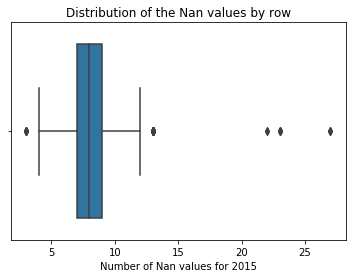

In [52]:
print("Description of Nan in each row for 2015 \n "+str(number_of_nan_by_row.describe()))
number_of_nan_by_row_df=pd.DataFrame({ 'Nan': number_of_nan_by_row } )

bx=sns.boxplot(x='Nan', data=number_of_nan_by_row_df)
bx.set_title('Distribution of the Nan values by row')
bx.set_xlabel('Number of Nan values for 2015')
plt.show()


###### Print the number of Nan by row for 2016

In [53]:
number_of_nan_by_row2016=input_data2016.isnull().sum(axis = 1)

Description of Nan in each row for 2016 
 count    3376.000000
mean        5.909953
std         1.763215
min         2.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        25.000000
dtype: float64


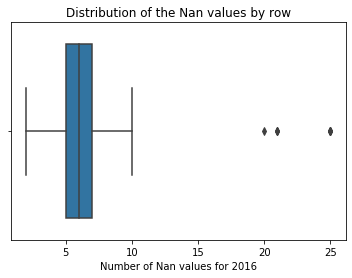

In [54]:
print("Description of Nan in each row for 2016 \n "+str(number_of_nan_by_row2016.describe()))
number_of_nan_by_row_2016_df=pd.DataFrame({ 'Nan': number_of_nan_by_row2016 } )

bx=sns.boxplot(x='Nan', data=number_of_nan_by_row_2016_df)
bx.set_title('Distribution of the Nan values by row')
bx.set_xlabel('Number of Nan values for 2016')
plt.show()

### PairPlot

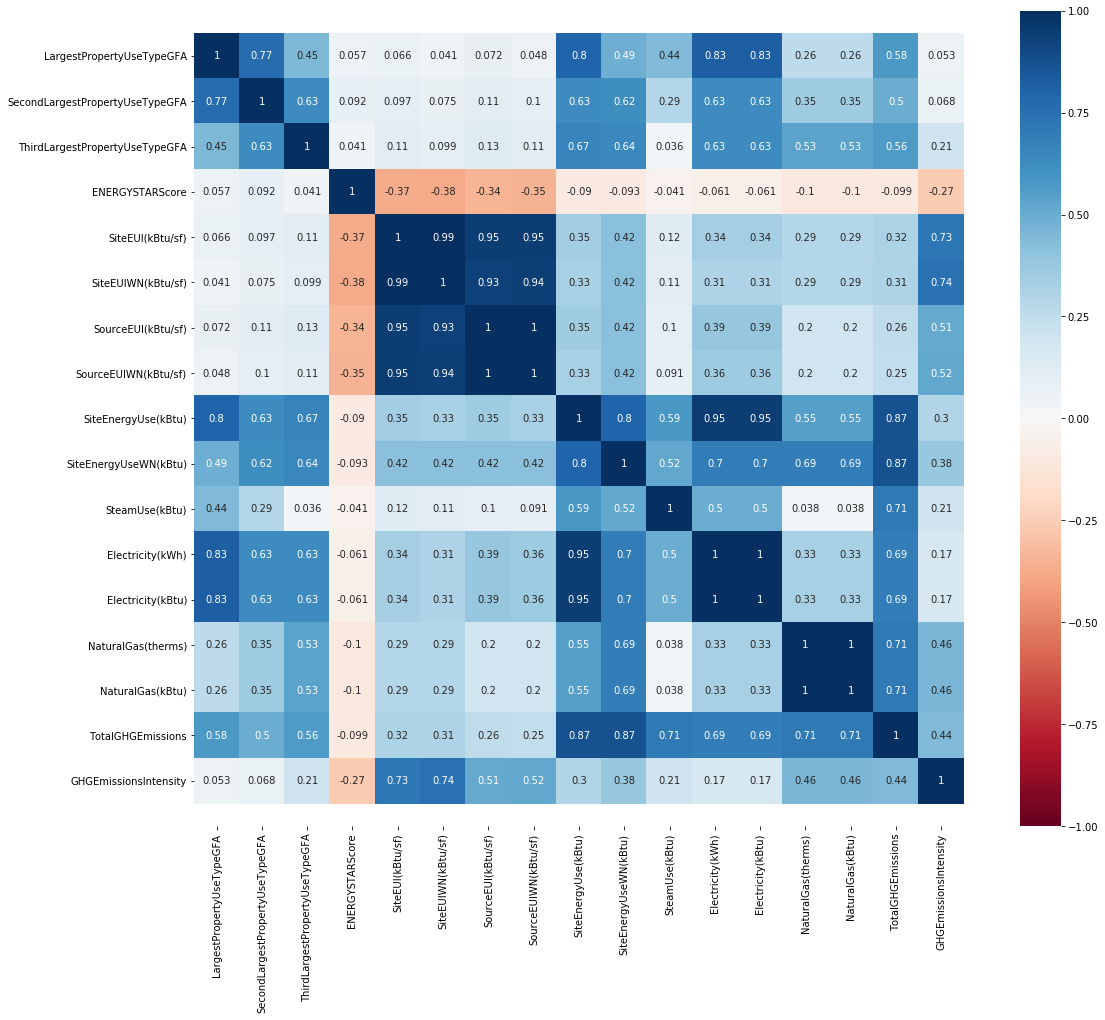

<Figure size 432x288 with 0 Axes>

In [55]:
plt.subplots(figsize=(20,15))
sns.heatmap(input_data[['LargestPropertyUseTypeGFA','SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
 'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
 'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
 'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
 'NaturalGas(kBtu)','TotalGHGEmissions', 'GHGEmissionsIntensity']].corr(), annot = True, vmin=-1, vmax=1, center= 0,square=True,cmap='RdBu')
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!
plt.savefig('heatmap.png')

There are some strong correlations among:
- 'SiteEUI(kBtu/sf)' and 'SiteEUIWN(kBtu/sf)' => we keep 'SiteEUI(kBtu/sf)'
- 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)' => we keep 'SourceEUI(kBtu/sf)'
- 'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)' => we keep 'SiteEnergyUse(kBtu)'
- 'Electricity(kWh)', 'Electricity(kBtu)' => we keep 'Electricity(kBtu)'
- 'NaturalGas(therms)','NaturalGas(kBtu)' => we keep 'NaturalGas(kBtu)' 

### Removal of the non relevant columns

In [56]:
input_data=input_data.drop(columns=['SiteEUIWN(kBtu/sf)','SourceEUIWN(kBtu/sf)','SiteEnergyUseWN(kBtu)','Electricity(kWh)','NaturalGas(therms)','ZipCode','TaxParcelIdentificationNumber','CouncilDistrictCode'],errors='ignore')

In [57]:
input_data

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity,OtherFuelUse(kBtu),Seattle Police Department Micro Community Policing Plan Areas,SPD Beats
0,1,2016,NonResidential,Hotel,Mayflower Park Hotel,Downtown,47.612,-122.3380,1927,1.0,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,182.500000,7226362.5,2003882.00,3946027.0,1276453.0,No,NaN,Compliant,NaN,249.98,2.83,NaN,NaN,NaN
1,2,2016,NonResidential,Hotel,Paramount Hotel,Downtown,47.613,-122.3339,1996,1.0,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,176.100006,8387933.0,0.00,3242851.0,5145082.0,No,NaN,Compliant,NaN,295.86,2.86,NaN,NaN,NaN
2,3,2016,NonResidential,Hotel,5673-the Westin Seattle,Downtown,47.614,-122.3381,1969,1.0,41.0,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,241.899994,72587024.0,21566554.00,49526664.0,1493800.0,No,NaN,Compliant,NaN,2089.28,2.19,NaN,NaN,NaN
3,5,2016,NonResidential,Hotel,Hotel Max,Downtown,47.614,-122.3366,1926,1.0,10.0,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,216.199997,6794584.0,2214446.25,2768924.0,1811213.0,No,NaN,Compliant,NaN,286.43,4.67,NaN,NaN,NaN
4,8,2016,NonResidential,Hotel,Warwick Seattle Hotel (id8),Downtown,47.614,-122.3405,1980,1.0,18.0,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,211.399994,14172606.0,0.00,5368607.0,8803998.0,No,NaN,Compliant,NaN,505.01,2.88,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6711,50049,2015,Multifamily LR (1-4),Low-Rise Multifamily,Pacific Center Condominium,Downtown,47.600,-122.3203,2000,1.0,4.0,44650,0,44650,Multifamily Housing,Multifamily Housing,44650.0,NaN,NaN,NaN,NaN,NaN,71.0,25.600000,80.400000,1142949.0,0.00,1142996.0,0.0,No,NaN,Compliant,NaN,7.97,0.07,0.0,26.0,16.0
6712,50055,2015,Multifamily MR (5-9),Mid-Rise Multifamily,Identity Apts 4123,Northeast,47.658,-122.3160,2014,1.0,7.0,42393,0,42393,Multifamily Housing,Multifamily Housing,31748.0,NaN,NaN,NaN,NaN,NaN,98.0,48.600000,124.200000,1543282.0,0.00,1111352.0,431976.0,No,NaN,Compliant,NaN,30.69,0.61,0.0,60.0,38.0
6713,50057,2015,Multifamily HR (10+),High-Rise Multifamily,Cirrus,Downtown,47.616,-122.3377,2015,1.0,40.0,319481,41915,277566,"Multifamily Housing, Parking",NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.0,52.700000,93.100000,16834414.0,0.00,5767761.0,11066893.0,No,NaN,Compliant,NaN,627.97,1.89,0.0,56.0,7.0
6714,50058,2015,Multifamily LR (1-4),Low-Rise Multifamily,Wedgewood Estates Bldg A,Northeast,47.684,-122.2874,1981,1.0,3.0,48230,0,48230,Multifamily Housing,Multifamily Housing,22310.0,NaN,NaN,NaN,NaN,NaN,44.0,34.800000,109.400000,777064.0,0.00,777096.0,0.0,No,NaN,Compliant,NaN,5.42,0.04,0.0,55.0,48.0


###### Set a flag when a record for a building is done in 2015 and 2016

In [58]:
input_data['IsDuplicated']=input_data[['OSEBuildingID']].duplicated()
#input_data['NumberofOccurences'] = input_data.groupby(['OSEBuildingID']).IsDuplicated.transform(np.sum)

###### Set a flag when a record is different in 2016 from 2015

In [59]:
def lookduplicates(data, listofcolumns):
    for count in listofcolumns:
        data['Same'+count]=data[['OSEBuildingID',count]].duplicated()
    return data

input_data=lookduplicates(input_data, text_data)

In [60]:
input_data

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity,OtherFuelUse(kBtu),Seattle Police Department Micro Community Policing Plan Areas,SPD Beats,IsDuplicated,SameENERGYSTARScore,SameBuildingType,SamePrimaryPropertyType,SameNeighborhood,SameLargestPropertyUseType,SameSecondLargestPropertyUseType,SameThirdLargestPropertyUseType,SameComplianceStatus
0,1,2016,NonResidential,Hotel,Mayflower Park Hotel,Downtown,47.612,-122.3380,1927,1.0,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,182.500000,7226362.5,2003882.00,3946027.0,1276453.0,No,NaN,Compliant,NaN,249.98,2.83,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False
1,2,2016,NonResidential,Hotel,Paramount Hotel,Downtown,47.613,-122.3339,1996,1.0,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,176.100006,8387933.0,0.00,3242851.0,5145082.0,No,NaN,Compliant,NaN,295.86,2.86,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False
2,3,2016,NonResidential,Hotel,5673-the Westin Seattle,Downtown,47.614,-122.3381,1969,1.0,41.0,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,241.899994,72587024.0,21566554.00,49526664.0,1493800.0,No,NaN,Compliant,NaN,2089.28,2.19,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False
3,5,2016,NonResidential,Hotel,Hotel Max,Downtown,47.614,-122.3366,1926,1.0,10.0,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,216.199997,6794584.0,2214446.25,2768924.0,1811213.0,No,NaN,Compliant,NaN,286.43,4.67,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False
4,8,2016,NonResidential,Hotel,Warwick Seattle Hotel (id8),Downtown,47.614,-122.3405,1980,1.0,18.0,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,211.399994,14172606.0,0.00,5368607.0,8803998.0,No,NaN,Compliant,NaN,505.01,2.88,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6711,50049,2015,Multifamily LR (1-4),Low-Rise Multifamily,Pacific Center Condominium,Downtown,47.600,-122.3203,2000,1.0,4.0,44650,0,44650,Multifamily Housing,Multifamily Housing,44650.0,NaN,NaN,NaN,NaN,NaN,71.0,25.600000,80.400000,1142949.0,0.00,1142996.0,0.0,No,NaN,Compliant,NaN,7.97,0.07,0.0,26.0,16.0,True,False,True,True,True,True,True,True,True
6712,50055,2015,Multifamily MR (5-9),Mid-Rise Multifamily,Identity Apts 4123,Northeast,47.658,-122.3160,2014,1.0,7.0,42393,0,42393,Multifamily Housing,Multifamily Housing,31748.0,NaN,NaN,NaN,NaN,NaN,98.0,48.600000,124.200000,1543282.0,0.00,1111352.0,431976.0,No,NaN,Compliant,NaN,30.69,0.61,0.0,60.0,38.0,True,False,True,True,True,True,True,True,True
6713,50057,2015,Multifamily HR (10+),High-Rise Multifamily,Cirrus,Downtown,47.616,-122.3377,2015,1.0,40.0,319481,41915,277566,"Multifamily Housing, Parking",NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.0,52.700000,93.100000,16834414.0,0.00,5767761.0,11066893.0,No,NaN,Compliant,NaN,627.97,1.89,0.0,56.0,7.0,True,False,True,True,True,False,False,False,True
6714,50058,2015,Multifamily LR (1-4),Low-Rise Multifamily,Wedgewood Estates Bldg A,Northeast,47.684,-122.2874,1981,1.0,3.0,48230,0,48230,Multifamily Housing,Multifamily Housing,22310.0,NaN

###### Set a flag to true if there are data in a specific column with data get at the end of the year.

In [61]:
def istheredata(data):
    if ((np.isnan(data)) or (data==0)):
         return False
    else :
        return True
 
    
for count in ['SiteEUI(kBtu/sf)','SourceEUI(kBtu/sf)','SiteEnergyUse(kBtu)','SteamUse(kBtu)','Electricity(kBtu)','NaturalGas(kBtu)','TotalGHGEmissions','GHGEmissionsIntensity','OtherFuelUse(kBtu)']:
    input_data['Is'+count] = input_data[count].apply(lambda data: istheredata(data))

In [62]:
input_data

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity,OtherFuelUse(kBtu),Seattle Police Department Micro Community Policing Plan Areas,SPD Beats,IsDuplicated,SameENERGYSTARScore,SameBuildingType,SamePrimaryPropertyType,SameNeighborhood,SameLargestPropertyUseType,SameSecondLargestPropertyUseType,SameThirdLargestPropertyUseType,SameComplianceStatus,IsSiteEUI(kBtu/sf),IsSourceEUI(kBtu/sf),IsSiteEnergyUse(kBtu),IsSteamUse(kBtu),IsElectricity(kBtu),IsNaturalGas(kBtu),IsTotalGHGEmissions,IsGHGEmissionsIntensity,IsOtherFuelUse(kBtu)
0,1,2016,NonResidential,Hotel,Mayflower Park Hotel,Downtown,47.612,-122.3380,1927,1.0,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,182.500000,7226362.5,2003882.00,3946027.0,1276453.0,No,NaN,Compliant,NaN,249.98,2.83,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,False
1,2,2016,NonResidential,Hotel,Paramount Hotel,Downtown,47.613,-122.3339,1996,1.0,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,176.100006,8387933.0,0.00,3242851.0,5145082.0,No,NaN,Compliant,NaN,295.86,2.86,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,True,True,True,False,True,True,True,True,False
2,3,2016,NonResidential,Hotel,5673-the Westin Seattle,Downtown,47.614,-122.3381,1969,1.0,41.0,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,241.899994,72587024.0,21566554.00,49526664.0,1493800.0,No,NaN,Compliant,NaN,2089.28,2.19,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,False
3,5,2016,NonResidential,Hotel,Hotel Max,Downtown,47.614,-122.3366,1926,1.0,10.0,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,216.199997,6794584.0,2214446.25,2768924.0,1811213.0,No,NaN,Compliant,NaN,286.43,4.67,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,False
4,8,2016,NonResidential,Hotel,Warwick Seattle Hotel (id8),Downtown,47.614,-122.3405,1980,1.0,18.0,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,211.399994,14172606.0,0.00,5368607.0,8803998.0,No,NaN,Compliant,NaN,505.01,2.88,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,True,True,True,False,True,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6711,50049,2015,Multifamily LR (1-4),Low-Rise Multifamily,Pacific Center Condominium,Downtown,47.600,-122.3203,2000,1.0,4.0,44650,0,44650,Multifamily Housing,Multifamily Housing,44650.0,NaN,NaN,NaN,NaN,NaN,71.0,25.600000,80.400000,1142949.0,0.00,1142996.0,0.0,No,NaN,Compliant,NaN,7.97,0.07,0.0,26.0,16.0,True,False,True,True,True,True,True,True,True,True,True,True,False,True,False,True,True,False
6712,50055,2015,Multifamily MR (5-9),Mid-Rise Multifamily,Identity Apts 4123,Northeast,47.658,-122.3160,2014,1.0,7.0,42393,0,42393,Multifamily Housing,Multifamily Housing,31748.0,NaN,NaN,NaN,NaN,NaN,98.0,48.600000,124.200000,1543282.0,0.00,1111352.0,431976.0,No,NaN,Compliant,NaN,30.69,0.61,0.0,60.0,38.0,True,False,True,True,True,True,True,True,True,True,True,True,False,True,True,

###### The duplicated rows ranked by OSEBuilding ID

In [63]:
duplicatedIDRowsDF =input_data[input_data.duplicated(subset='OSEBuildingID', keep=False)]

In [64]:
duplicatedIDRowsDF.sort_values('OSEBuildingID')

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity,OtherFuelUse(kBtu),Seattle Police Department Micro Community Policing Plan Areas,SPD Beats,IsDuplicated,SameENERGYSTARScore,SameBuildingType,SamePrimaryPropertyType,SameNeighborhood,SameLargestPropertyUseType,SameSecondLargestPropertyUseType,SameThirdLargestPropertyUseType,SameComplianceStatus,IsSiteEUI(kBtu/sf),IsSourceEUI(kBtu/sf),IsSiteEnergyUse(kBtu),IsSteamUse(kBtu),IsElectricity(kBtu),IsNaturalGas(kBtu),IsTotalGHGEmissions,IsGHGEmissionsIntensity,IsOtherFuelUse(kBtu)
0,1,2016,NonResidential,Hotel,Mayflower Park Hotel,Downtown,47.612,-122.3380,1927,1.0,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,182.500000,7.226362e+06,2003882.0,3946027.0,1276453.0,No,NaN,Compliant,NaN,249.98,2.83,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,False
3376,1,2015,NonResidential,Hotel,Mayflower Park Hotel,Downtown,47.612,-122.3380,1927,1.0,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,78.900000,173.500000,6.981428e+06,2023032.0,3686160.0,1272388.0,No,NaN,Compliant,NaN,249.43,2.64,0.0,14.0,31.0,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False
1,2,2016,NonResidential,Hotel,Paramount Hotel,Downtown,47.613,-122.3339,1996,1.0,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,176.100006,8.387933e+06,0.0,3242851.0,5145082.0,No,NaN,Compliant,NaN,295.86,2.86,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,True,True,True,False,True,True,True,True,False
3377,2,2015,NonResidential,Hotel,Paramount Hotel,Downtown,47.613,-122.3334,1996,1.0,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,51.0,94.400000,191.300000,8.354235e+06,0.0,3905411.0,4448985.0,No,NaN,Compliant,NaN,263.51,2.38,0.0,14.0,31.0,True,False,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,False
2,3,2016,NonResidential,Hotel,5673-the Westin Seattle,Downtown,47.614,-122.3381,1969,1.0,41.0,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,241.899994,7.258702e+07,21566554.0,49526664.0,1493800.0,No,NaN,Compliant,NaN,2089.28,2.19,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3333,50057,2016,Multifamily HR (10+),High-Rise Multifamily,Cirrus,Downtown,47.617,-122.3374,2015,1.0,40.0,319481,41915,277566,"Multifamily Housing, Office, Other - Lodging/R...",Multifamily Housing,308680.0,Other - Lodging/Residential,52538.0,Parking,35180.0,NaN,NaN,41.900002,96.099998,1.540416e+07,0.0,9164908.0,6239252.0,No,NaN,Compliant,NaN,395.26,1.24,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,True,True,True,False,True,True,True,True,False
6714,50058,2015,Multifamily LR (1-4),Low-Rise Multifamily,Wedgewood Estates Bldg A,Northeast,47.684,-122.2874,1981,1.0,3.0,48230,0,48230,Multifamily Housing,Multifamily Housing,22310.0,NaN,NaN,NaN,NaN,NaN,44.0,34.800000,109.400000,7.770640e+05,0.0,777096.0,0.0,No,NaN,Compliant,NaN,5.42,0.04,0.0,55.0,48.0,True,False,

In [65]:
pd.option_context('display.max_rows', None)

### Data normalisation and removal of the Nan values when data from previous years are available.

In [66]:
backup_data=input_data
normdatadict={ 'University':'College/University', 'Warehouse': 'Non-Refrigerated Warehouse', 'Residence Hall' : 'Residence Hall/Dormitory', 'SPS-District K-12': 'K-12 School','Supermarket / Grocery Store':'Retail Store','Other - Mall':'Retail Store', 'Supermarket/Grocery Store':'Retail Store'}

def normalisetextdata(inputdf,columntoclean) :
    #input_data.iloc[dupdf[columntoclean].isin(list(normdatadict.keys())).index][columntoclean].replace(normdatadict, inplace=True)
    #inputdf.iloc[inputdf[columntoclean].isin(list(normdatadict.keys())).index][columntoclean].str.strip().replace(normdatadict, inplace=True)
    #inputdf[columntoclean] = inputdf[columntoclean].replace(normdatadict)
    #inputdf.replace({columntoclean: normdatadict}) 
    #df.loc[df['col1'].isin(dict1.keys()), 'col2'] = df['col1'].map(dict1)
    #print(columntoclean+ " "+str(input_data.loc[input_data[columntoclean].isin(normdatadict.keys())]==True))
   # print(columntoclean+ " "+str(input_data[columntoclean].isin(normdatadict.keys()).sum()))
    input_data.loc[input_data[columntoclean].isin(normdatadict.keys()), columntoclean] = input_data[columntoclean].map(normdatadict)
    #inputdf[columntoclean+'test']=inputdf[columntoclean].map(normdatadict) #
    #return (''.join(doc.split()))
    #return (str(character.strip())

for count in text_data:
    normalisetextdata(input_data,count)
    



In [67]:
#Save the Dataframe in a CSV file
backup_data.to_csv('./backupdata.csv', sep=',',header=True,quoting=csv.QUOTE_ALL, columns=backup_data.columns.tolist(), index=False) 


In [68]:
###### The duplicated rows ranked by OSEBuilding ID

In [69]:
duplicatedIDRowsDF =input_data[input_data.duplicated(subset='OSEBuildingID', keep=False)]

In [70]:
duplicatedIDRowsDF.sort_values('OSEBuildingID')

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity,OtherFuelUse(kBtu),Seattle Police Department Micro Community Policing Plan Areas,SPD Beats,IsDuplicated,SameENERGYSTARScore,SameBuildingType,SamePrimaryPropertyType,SameNeighborhood,SameLargestPropertyUseType,SameSecondLargestPropertyUseType,SameThirdLargestPropertyUseType,SameComplianceStatus,IsSiteEUI(kBtu/sf),IsSourceEUI(kBtu/sf),IsSiteEnergyUse(kBtu),IsSteamUse(kBtu),IsElectricity(kBtu),IsNaturalGas(kBtu),IsTotalGHGEmissions,IsGHGEmissionsIntensity,IsOtherFuelUse(kBtu)
0,1,2016,NonResidential,Hotel,Mayflower Park Hotel,Downtown,47.612,-122.3380,1927,1.0,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60,81.699997,182.500000,7.226362e+06,2003882.0,3946027.0,1276453.0,No,NaN,Compliant,NaN,249.98,2.83,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,False
3376,1,2015,NonResidential,Hotel,Mayflower Park Hotel,Downtown,47.612,-122.3380,1927,1.0,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65,78.900000,173.500000,6.981428e+06,2023032.0,3686160.0,1272388.0,No,NaN,Compliant,NaN,249.43,2.64,0.0,14.0,31.0,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False
1,2,2016,NonResidential,Hotel,Paramount Hotel,Downtown,47.613,-122.3339,1996,1.0,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61,94.800003,176.100006,8.387933e+06,0.0,3242851.0,5145082.0,No,NaN,Compliant,NaN,295.86,2.86,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,True,True,True,False,True,True,True,True,False
3377,2,2015,NonResidential,Hotel,Paramount Hotel,Downtown,47.613,-122.3334,1996,1.0,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,51,94.400000,191.300000,8.354235e+06,0.0,3905411.0,4448985.0,No,NaN,Compliant,NaN,263.51,2.38,0.0,14.0,31.0,True,False,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,False
2,3,2016,NonResidential,Hotel,5673-the Westin Seattle,Downtown,47.614,-122.3381,1969,1.0,41.0,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43,96.000000,241.899994,7.258702e+07,21566554.0,49526664.0,1493800.0,No,NaN,Compliant,NaN,2089.28,2.19,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3333,50057,2016,Multifamily HR (10+),High-Rise Multifamily,Cirrus,Downtown,47.617,-122.3374,2015,1.0,40.0,319481,41915,277566,"Multifamily Housing, Office, Other - Lodging/R...",Multifamily Housing,308680.0,Other - Lodging/Residential,52538.0,Parking,35180.0,NaN,NaN,41.900002,96.099998,1.540416e+07,0.0,9164908.0,6239252.0,No,NaN,Compliant,NaN,395.26,1.24,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,True,True,True,False,True,True,True,True,False
6714,50058,2015,Multifamily LR (1-4),Low-Rise Multifamily,Wedgewood Estates Bldg A,Northeast,47.684,-122.2874,1981,1.0,3.0,48230,0,48230,Multifamily Housing,Multifamily Housing,22310.0,NaN,NaN,NaN,NaN,NaN,44,34.800000,109.400000,7.770640e+05,0.0,777096.0,0.0,No,NaN,Compliant,NaN,5.42,0.04,0.0,55.0,48.0,True,False,True,True,Tr

In [71]:
#normdatadict={ 'University':'College/University', 'Warehouse': 'Non-Refrigerated Warehouse', 'Residence Hall' : 'Residence Hall/Dormitory', 'SPS-District K-12': 'K-12 School','Supermarket / Grocery Store':'Retail Store','Other - Mall':'Retail Store'}

#backup_data=input_data
#def normtextdata(dupdf,columntoclean) :
#    input_data.iloc[dupdf[columntoclean].isin(list(normdatadict.keys())).index][columntoclean].replace(normdatadict, inplace=True)
 


for count in text_data:
#for count in ['LargestPropertyUseType','SecondLargestPropertyUseType','ThirdLargestPropertyUseType']:
    #input_data['Same'+count]=input_data[['OSEBuildingID',count]].duplicated()
   # normtextdata(input_data,count)
    duplicatedRowsDF=input_data[input_data.duplicated(subset=['OSEBuildingID',count],keep=False)]
    df_diff = pd.concat([duplicatedIDRowsDF,duplicatedRowsDF]).drop_duplicates(subset=['OSEBuildingID','DataYear'],keep=False)
    #normtextdata(df_diff,count)
    #normalisetextdata(df_diff,count)
    df_diff[count] = df_diff.groupby('OSEBuildingID')[count].ffill()
    df_diff[count] = df_diff.groupby('OSEBuildingID')[count].bfill()
    print(df_diff[['OSEBuildingID','DataYear',count]].sort_values('OSEBuildingID').to_string())
    print(count)
    #input_data.loc[df_diff.index,count]=df_diff.loc[df_diff.index,count]
    input_data.loc[df_diff.index,count]=df_diff.loc[df_diff.index,count]
    #input_data=pd.concat([input_data,df_diff])
    #input_data[count].update(df_diff[count])count

      OSEBuildingID  DataYear ENERGYSTARScore
0                 1      2016              60
3376              1      2015              65
3377              2      2015              51
1                 2      2016              61
2                 3      2016              43
3378              3      2015              18
3                 5      2016              56
3379              5      2015               1
4                 8      2016              75
3380              8      2015              67
3382             10      2015              25
6                10      2016              27
3384             12      2015              46
8                12      2016              43
3385             13      2015               2
9                13      2016               1
3386             15      2015              48
10               15      2016              30
3387             16      2015              32
11               16      2016              36
3388             17      2015     

      OSEBuildingID  DataYear                 LargestPropertyUseType
10               15      2016                                  Hotel
3386             15      2015                                  Hotel
14               19      2016                                  Hotel
3390             19      2015                                  Hotel
19               25      2016                                  Hotel
3395             25      2015                                  Hotel
36               46      2016             Non-Refrigerated Warehouse
3411             46      2015             Non-Refrigerated Warehouse
52               67      2016                                  Hotel
3428             67      2015                                  Hotel
161             260      2016                            K-12 School
3536            260      2015                            K-12 School
194             314      2016                                  Hotel
3570            314      2015     

###### Analyse the changes with the data completion

ChangeENERGYSTARScore 1509
ChangeBuildingType 0
ChangePrimaryPropertyType 0
ChangeNeighborhood 0
ChangeLargestPropertyUseType 41
ChangeSecondLargestPropertyUseType 3380
ChangeThirdLargestPropertyUseType 5527
ChangeComplianceStatus 0


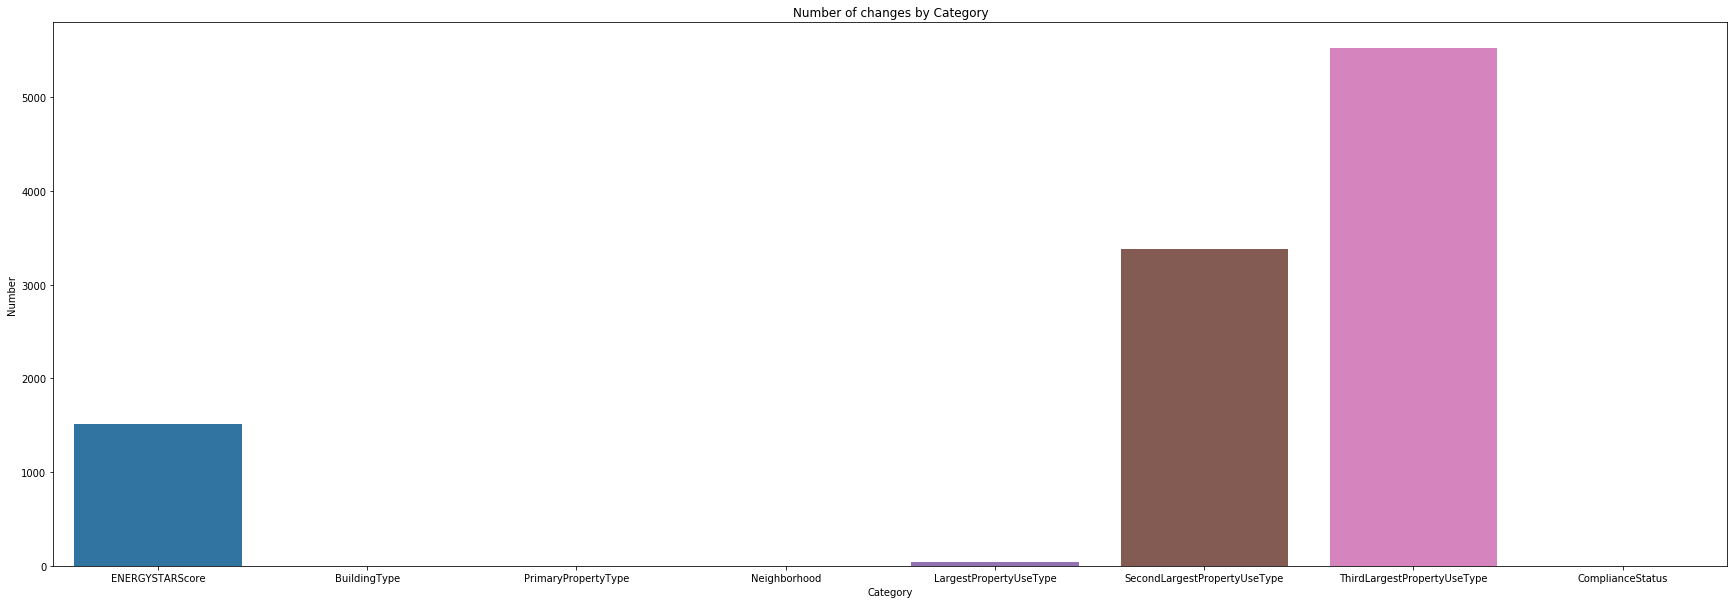

In [72]:
def changefrombackup():
    for count in text_data:
        input_data['Change'+count] = np.where(input_data[count] == backup_data[count], 'True', 'False')

def displaychange():
    mydata=[]
    for count in text_data:
        print('Change'+count+' '+str(len(input_data[input_data['Change'+count] == "False"])))
        mydata.append([count,len(input_data[input_data['Change'+count] == "False"])])
    change_df = pd.DataFrame(mydata, columns = ['Category', 'Number']) 
    plt.figure(figsize=(30,10))
    ax = sns.barplot(x="Category", y="Number", data=change_df)
    ax.set_title('Number of changes by Category')
    ax.set_xlabel('Category')
    ax.set_ylabel('Number')
    plt.show()
        
changefrombackup()
displaychange()

In [73]:
['ChangeBuildingType',0]

['ChangeBuildingType', 0]

In [74]:
input_data=lookduplicates(input_data, text_data)

for count in text_data:
    normalisetextdata(input_data,count)

###### Analyse the changes with data completion and data normalisation

ChangeENERGYSTARScore 1509
ChangeBuildingType 0
ChangePrimaryPropertyType 0
ChangeNeighborhood 0
ChangeLargestPropertyUseType 41
ChangeSecondLargestPropertyUseType 3380
ChangeThirdLargestPropertyUseType 5527
ChangeComplianceStatus 0


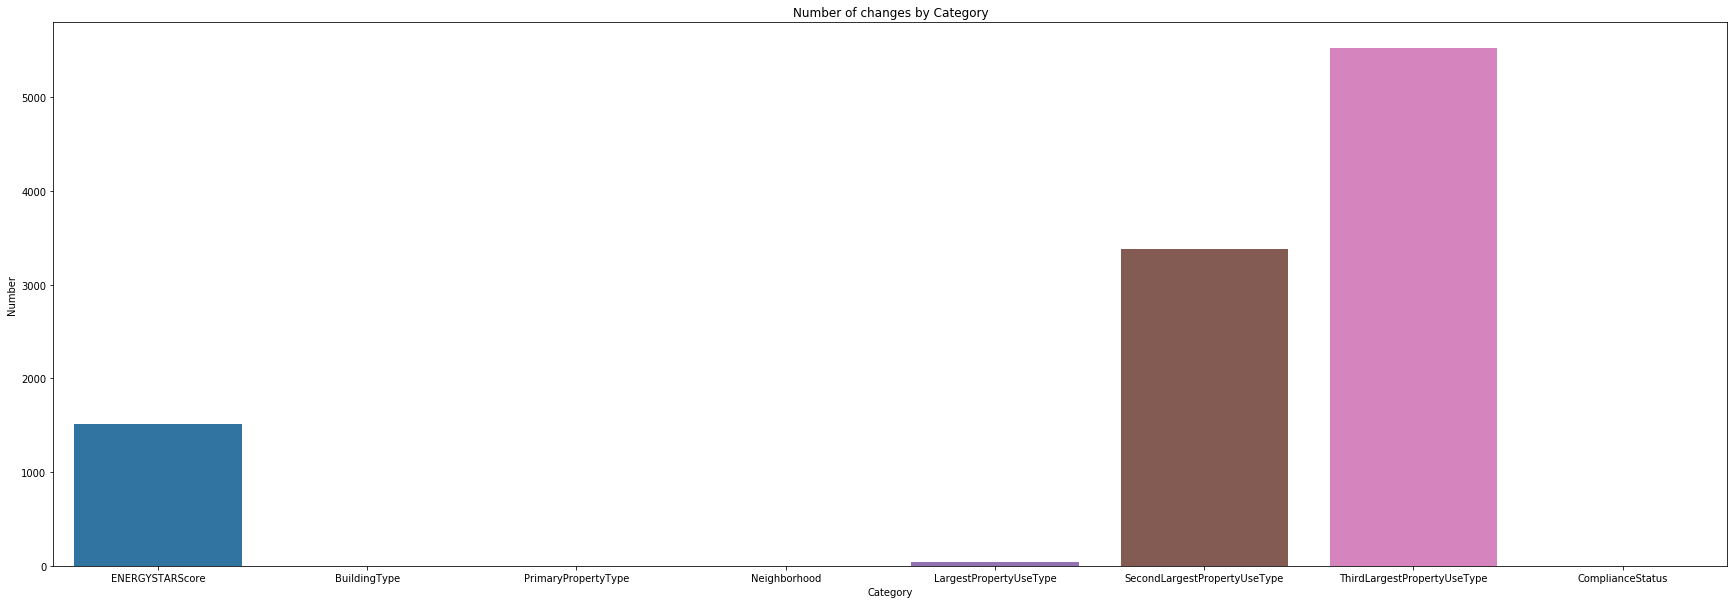

In [75]:
changefrombackup()
displaychange()

In [76]:
input_data

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity,OtherFuelUse(kBtu),Seattle Police Department Micro Community Policing Plan Areas,SPD Beats,IsDuplicated,SameENERGYSTARScore,SameBuildingType,SamePrimaryPropertyType,SameNeighborhood,SameLargestPropertyUseType,SameSecondLargestPropertyUseType,SameThirdLargestPropertyUseType,SameComplianceStatus,IsSiteEUI(kBtu/sf),IsSourceEUI(kBtu/sf),IsSiteEnergyUse(kBtu),IsSteamUse(kBtu),IsElectricity(kBtu),IsNaturalGas(kBtu),IsTotalGHGEmissions,IsGHGEmissionsIntensity,IsOtherFuelUse(kBtu),ChangeENERGYSTARScore,ChangeBuildingType,ChangePrimaryPropertyType,ChangeNeighborhood,ChangeLargestPropertyUseType,ChangeSecondLargestPropertyUseType,ChangeThirdLargestPropertyUseType,ChangeComplianceStatus
0,1,2016,NonResidential,Hotel,Mayflower Park Hotel,Downtown,47.612,-122.3380,1927,1.0,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60,81.699997,182.500000,7226362.5,2003882.00,3946027.0,1276453.0,No,NaN,Compliant,NaN,249.98,2.83,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,False,True,True,True,True,True,False,False,True
1,2,2016,NonResidential,Hotel,Paramount Hotel,Downtown,47.613,-122.3339,1996,1.0,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61,94.800003,176.100006,8387933.0,0.00,3242851.0,5145082.0,No,NaN,Compliant,NaN,295.86,2.86,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,True,True,True,False,True,True,True,True,False,True,True,True,True,True,True,True,True
2,3,2016,NonResidential,Hotel,5673-the Westin Seattle,Downtown,47.614,-122.3381,1969,1.0,41.0,956110,196718,759392,Hotel,Hotel,756493.0,Parking,NaN,Swimming Pool,NaN,NaN,43,96.000000,241.899994,72587024.0,21566554.00,49526664.0,1493800.0,No,NaN,Compliant,NaN,2089.28,2.19,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True
3,5,2016,NonResidential,Hotel,Hotel Max,Downtown,47.614,-122.3366,1926,1.0,10.0,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56,110.800003,216.199997,6794584.0,2214446.25,2768924.0,1811213.0,No,NaN,Compliant,NaN,286.43,4.67,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,False,True,True,True,True,True,False,False,True
4,8,2016,NonResidential,Hotel,Warwick Seattle Hotel (id8),Downtown,47.614,-122.3405,1980,1.0,18.0,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75,114.800003,211.399994,14172606.0,0.00,5368607.0,8803998.0,No,NaN,Compliant,NaN,505.01,2.88,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,True,True,True,False,True,True,True,True,False,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6711,50049,2015,Multifamily LR (1-4),Low-Rise Multifamily,Pacific Center Condominium,Downtown,47.600,-122.3203,2000,1.0,4.0,44650,0,44650,Multifamily Housing,Multifamily Housing,44650.0,NaN,NaN,NaN,NaN,NaN,71,25.600000,80.400000,1142949.0,0.00,1142996.0,0.0,No,NaN,Compliant,NaN,7.97,0.07,0.0,26.0,16.0,True,False,True,True,True,True,

In [77]:
#Save the Dataframe in a CSV file
input_data.to_csv('./inputdata.csv', sep=',',header=True,quoting=csv.QUOTE_ALL, columns=input_data.columns.tolist(), index=False) 


In [78]:
input_data['ChangeThirdLargestPropertyUseType']

0       False
1        True
2        True
3       False
4        True
        ...  
6711    False
6712    False
6713     True
6714    False
6715    False
Name: ChangeThirdLargestPropertyUseType, Length: 6716, dtype: object

### Manage the Nan for the columns 'NumberofBuildings','NumberofFloors','PropertyGFATotal', 'PropertyGFAParking','PropertyGFABuilding(s)'


In [79]:
rowdatacolumns=['ENERGYSTARScore','NumberofBuildings','NumberofFloors','PropertyGFATotal', 'PropertyGFAParking','PropertyGFABuilding(s)']


In [80]:
 input_data[rowdatacolumns]=input_data[rowdatacolumns].fillna(0)

In [81]:
#input_data=backup_data
#duplicatedRowsDF=input_data[input_data.duplicated(subset=['OSEBuildingID','LargestPropertyUseType'],keep=False)]
#df_diff = pd.concat([duplicatedIDRowsDF,duplicatedRowsDF]).drop_duplicates(subset=['OSEBuildingID','DataYear'],keep=False)
#test_df=df_diff

#test_df['LargestPropertyUseType'] = test_df.groupby('OSEBuildingID')['LargestPropertyUseType'].ffill()
#test_df['LargestPropertyUseType'] = test_df.groupby('OSEBuildingID')['LargestPropertyUseType'].bfill()
#my_test_df=test_df.set_index(['OSEBuildingID','DataYear'])
#print("\nAfter "+test_df[['OSEBuildingID','DataYear','LargestPropertyUseType']].sort_values('OSEBuildingID').to_string())


#input_data.loc[test_df.index,'LargestPropertyUseType']=test_df.loc[test_df.index,'LargestPropertyUseType']



In [82]:
for count in text_data:
    print ('Change'+count+' '+str(len(input_data[input_data['Change'+count] == "False"])))

ChangeENERGYSTARScore 1509
ChangeBuildingType 0
ChangePrimaryPropertyType 0
ChangeNeighborhood 0
ChangeLargestPropertyUseType 41
ChangeSecondLargestPropertyUseType 3380
ChangeThirdLargestPropertyUseType 5527
ChangeComplianceStatus 0


In [83]:
#ax=sns.barplot(x='ChangePrimaryPropertyType	',y='AveragedScore', data=input_data, estimator=sum)
#ax.set_title('Averaged Score by country')
#ax.set_xlabel('Countries')
#ax.set_ylabel('Averaged Score')
#ax = input_data.plot.bar(x='lab', y='val', rot=0)

### Manage the encoding values using LabelEncoding among the following columns: 'BuildingType', 'Neighborhood','PrimaryPropertyType','LargestPropertyUseType','SecondLargestPropertyUseType','ThirdLargestPropertyUseType'

In [84]:
def labelencoding(listofcolumns):
    input_data[listofcolumns]=input_data[listofcolumns].fillna("")
    listofcolumns_array=np.unique(input_data[listofcolumns].values)
    listofcolumns_id_array=np.arange(1, len(listofcolumns_array)+1, 1)
    listofcolumns_dictionary = dict(zip(listofcolumns_array, listofcolumns_id_array))
    print(listofcolumns_dictionary)
    for count in listofcolumns:
        input_data['LE_'+count] = input_data[count].map(listofcolumns_dictionary)

labelencoding(['BuildingType'])
labelencoding(['Neighborhood'])
labelencoding(['PrimaryPropertyType','LargestPropertyUseType','SecondLargestPropertyUseType','ThirdLargestPropertyUseType'])





{'Campus': 1, 'K-12 School': 2, 'Multifamily HR (10+)': 3, 'Multifamily LR (1-4)': 4, 'Multifamily MR (5-9)': 5, 'NonResidential': 6, 'Nonresidential COS': 7, 'Nonresidential WA': 8}
{'Ballard': 1, 'Central': 2, 'Delridge': 3, 'Downtown': 4, 'East': 5, 'Greater Duwamish': 6, 'Lake Union': 7, 'Magnolia / Queen Anne': 8, 'North': 9, 'Northeast': 10, 'Northwest': 11, 'Southeast': 12, 'Southwest': 13}
{'': 1, 'Adult Education': 2, 'Automobile Dealership': 3, 'Bank Branch': 4, 'Bar/Nightclub': 5, 'College/University': 6, 'Convenience Store without Gas Station': 7, 'Convention Center': 8, 'Courthouse': 9, 'Data Center': 10, 'Distribution Center': 11, 'Enclosed Mall': 12, 'Fast Food Restaurant': 13, 'Financial Office': 14, 'Fire Station': 15, 'Fitness Center/Health Club/Gym': 16, 'Food Sales': 17, 'Food Service': 18, 'High-Rise Multifamily': 19, 'Hospital': 20, 'Hospital (General Medical & Surgical)': 21, 'Hotel': 22, 'K-12 School': 23, 'Laboratory': 24, 'Large Office': 25, 'Library': 26, 'Li

### Manage the encoding values using OneHotEncoder among the following columns: 'BuildingType', 'Neighborhood','PrimaryPropertyType','LargestPropertyUseType','SecondLargestPropertyUseType','ThirdLargestPropertyUseType'

In [85]:
from sklearn.preprocessing import OneHotEncoder
# creating instance of one-hot-encoder
onehotencode = OneHotEncoder(handle_unknown='ignore')
# passing bridge-types-cat column (label encoded values of bridge_types)
#enc_df = pd.DataFrame(enc.fit_transform(input_data[['BuildingType']]).toarray())

#array_of_types = onehotencode.fit_transform(input_data[['BuildingType']]).toarray()

#dfOneHot = pd.DataFrame(array_of_types, columns = ["BuildingType_"+str(int(i)) for i in range(array_of_types.shape[1])])


def onehotencoding(mydf,columnname):
        array_of_types = onehotencode.fit_transform(mydf[columnname]).toarray()
        print(columnname)
        print(array_of_types)
        dfOneHot = pd.DataFrame(array_of_types, columns = ["OHE_"+columnname[0]+"_"+str(int(i)) for i in range(array_of_types.shape[1])])
        #print(dfOneHot)
        
        mydf = pd.concat([mydf, dfOneHot], axis=1)
        return mydf

input_data=onehotencoding(input_data,['BuildingType'])
input_data=onehotencoding(input_data,['Neighborhood'])
input_data=onehotencoding(input_data,['PrimaryPropertyType'])
input_data=onehotencoding(input_data,['LargestPropertyUseType'])
input_data=onehotencoding(input_data,['SecondLargestPropertyUseType'])
input_data=onehotencoding(input_data,['ThirdLargestPropertyUseType'])


['BuildingType']
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
['Neighborhood']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
['PrimaryPropertyType']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
['LargestPropertyUseType']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
['SecondLargestPropertyUseType']
[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
['ThirdLargestPropertyUseType']
[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0.

### Manage the encoding values using TargetEncoder among the following columns: 'BuildingType', 'Neighborhood','PrimaryPropertyType','LargestPropertyUseType','SecondLargestPropertyUseType','ThirdLargestPropertyUseType

In [86]:
def targetencoding(mydf,column,target):
    mydf['TE_'+target+'_'+column] = mydf[column].map(mydf.groupby(column)[target].median())
    return mydf

input_data=targetencoding(input_data,column='BuildingType',target='SiteEnergyUse(kBtu)')
input_data=targetencoding(input_data,column='Neighborhood',target='SiteEnergyUse(kBtu)')
input_data=targetencoding(input_data,column='PrimaryPropertyType',target='SiteEnergyUse(kBtu)')
input_data=targetencoding(input_data,column='LargestPropertyUseType',target='SiteEnergyUse(kBtu)')
input_data=targetencoding(input_data,column='SecondLargestPropertyUseType',target='SiteEnergyUse(kBtu)')
input_data=targetencoding(input_data,column='ThirdLargestPropertyUseType',target='SiteEnergyUse(kBtu)')


input_data=targetencoding(input_data,column='BuildingType',target='TotalGHGEmissions')
input_data=targetencoding(input_data,column='Neighborhood',target='TotalGHGEmissions')
input_data=targetencoding(input_data,column='PrimaryPropertyType',target='TotalGHGEmissions')
input_data=targetencoding(input_data,column='LargestPropertyUseType',target='TotalGHGEmissions')
input_data=targetencoding(input_data,column='SecondLargestPropertyUseType',target='TotalGHGEmissions')
input_data=targetencoding(input_data,column='ThirdLargestPropertyUseType',target='TotalGHGEmissions')


In [87]:
input_data['BuildingType'].map(input_data.groupby('BuildingType')['SiteEnergyUse(kBtu)'].median())

0       2520701.125
1       2520701.125
2       2520701.125
3       2520701.125
4       2520701.125
           ...     
6711     965786.000
6712    2000488.125
6713    6750112.000
6714     965786.000
6715     965786.000
Name: BuildingType, Length: 6716, dtype: float64

In [88]:
input_data

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity,OtherFuelUse(kBtu),Seattle Police Department Micro Community Policing Plan Areas,SPD Beats,IsDuplicated,SameENERGYSTARScore,SameBuildingType,SamePrimaryPropertyType,SameNeighborhood,SameLargestPropertyUseType,SameSecondLargestPropertyUseType,SameThirdLargestPropertyUseType,SameComplianceStatus,IsSiteEUI(kBtu/sf),IsSourceEUI(kBtu/sf),IsSiteEnergyUse(kBtu),IsSteamUse(kBtu),IsElectricity(kBtu),IsNaturalGas(kBtu),IsTotalGHGEmissions,IsGHGEmissionsIntensity,IsOtherFuelUse(kBtu),ChangeENERGYSTARScore,ChangeBuildingType,ChangePrimaryPropertyType,ChangeNeighborhood,ChangeLargestPropertyUseType,ChangeSecondLargestPropertyUseType,ChangeThirdLargestPropertyUseType,ChangeComplianceStatus,LE_BuildingType,LE_Neighborhood,LE_PrimaryPropertyType,LE_LargestPropertyUseType,LE_SecondLargestPropertyUseType,LE_ThirdLargestPropertyUseType,OHE_BuildingType_0,OHE_BuildingType_1,OHE_BuildingType_2,OHE_BuildingType_3,OHE_BuildingType_4,OHE_BuildingType_5,OHE_BuildingType_6,OHE_BuildingType_7,OHE_Neighborhood_0,OHE_Neighborhood_1,OHE_Neighborhood_2,OHE_Neighborhood_3,OHE_Neighborhood_4,OHE_Neighborhood_5,OHE_Neighborhood_6,OHE_Neighborhood_7,OHE_Neighborhood_8,OHE_Neighborhood_9,OHE_Neighborhood_10,OHE_Neighborhood_11,OHE_Neighborhood_12,OHE_PrimaryPropertyType_0,OHE_PrimaryPropertyType_1,OHE_PrimaryPropertyType_2,OHE_PrimaryPropertyType_3,OHE_PrimaryPropertyType_4,OHE_PrimaryPropertyType_5,OHE_PrimaryPropertyType_6,OHE_PrimaryPropertyType_7,OHE_PrimaryPropertyType_8,OHE_PrimaryPropertyType_9,OHE_PrimaryPropertyType_10,OHE_PrimaryPropertyType_11,OHE_PrimaryPropertyType_12,OHE_PrimaryPropertyType_13,OHE_PrimaryPropertyType_14,OHE_PrimaryPropertyType_15,OHE_PrimaryPropertyType_16,OHE_PrimaryPropertyType_17,OHE_PrimaryPropertyType_18,OHE_PrimaryPropertyType_19,OHE_PrimaryPropertyType_20,OHE_PrimaryPropertyType_21,OHE_PrimaryPropertyType_22,OHE_LargestPropertyUseType_0,OHE_LargestPropertyUseType_1,OHE_LargestPropertyUseType_2,OHE_LargestPropertyUseType_3,OHE_LargestPropertyUseType_4,OHE_LargestPropertyUseType_5,OHE_LargestPropertyUseType_6,OHE_LargestPropertyUseType_7,OHE_LargestPropertyUseType_8,OHE_LargestPropertyUseType_9,OHE_LargestPropertyUseType_10,OHE_LargestPropertyUseType_11,OHE_LargestPropertyUseType_12,OHE_LargestPropertyUseType_13,OHE_LargestPropertyUseType_14,OHE_LargestPropertyUseType_15,OHE_LargestPropertyUseType_16,OHE_LargestPropertyUseType_17,OHE_LargestPropertyUseType_18,OHE_LargestPropertyUseType_19,OHE_LargestPropertyUseType_20,OHE_LargestPropertyUseType_21,OHE_LargestPropertyUseType_22,OHE_LargestPropertyUseType_23,OHE_LargestPropertyUseType_24,OHE_LargestPropertyUseType_25,OHE_LargestPropertyUseType_26,OHE_LargestPropertyUseType_27,OHE_LargestPropertyUseType_28,OHE_LargestPropertyUseType_29,OHE_LargestPropertyUseType_30,OHE_LargestPropertyUseType_31,OHE_LargestPropertyUseType_32,OHE_LargestPropertyUseType_33,OHE_LargestPropertyUseType_34,OHE_LargestPropertyUseType_35,OHE_LargestPropertyUseType_36,OHE_LargestPropertyUseType_37,OHE_LargestPropertyUseType_38,OHE_LargestPropertyUseType_39,OHE_LargestPropertyUseType_40,OHE_LargestPropertyUseType_41,OHE_LargestPropertyUseType_42,OHE_LargestPropertyUseType_43,OHE_LargestPropertyUseType_44,OHE_LargestPropertyUseType_45,OHE_LargestPropertyUseType_46,OHE_LargestPropertyUseType_47,OHE_LargestPropertyUseType_48,OHE_LargestPropertyUseType_49,OHE_LargestPropertyUseType_50,OHE_La

In [89]:
#onehotencoder = OneHotEncoder(categorical_features = ['BuildingType']) 
#test = onehotencoder.fit_transform(input_data).toarray() 

###### Compute some statistics about numerical data

In [90]:
numerical_data=['SiteEUI(kBtu/sf)','SourceEUI(kBtu/sf)','SiteEnergyUse(kBtu)','SteamUse(kBtu)','Electricity(kBtu)','NaturalGas(kBtu)','TotalGHGEmissions', 'GHGEmissionsIntensity']

count    6716.000000
mean       54.045191
std        55.099179
min         0.000000
25%        27.500000
50%        37.900002
75%        60.099998
max       834.400024
Name: SiteEUI(kBtu/sf), dtype: float64


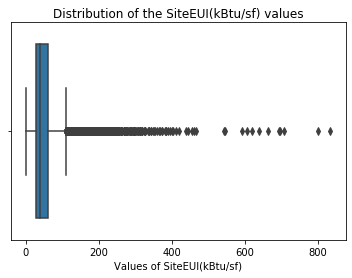

count    6716.000000
mean      133.132594
std       135.670587
min        -2.000000
25%        73.900000
50%        95.500000
75%       143.800003
max      2620.000000
Name: SourceEUI(kBtu/sf), dtype: float64


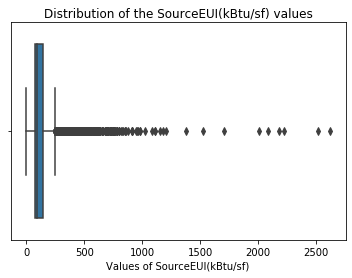

count    6.716000e+03
mean     5.183071e+06
std      1.811787e+07
min      0.000000e+00
25%      9.175949e+05
50%      1.786446e+06
75%      4.120209e+06
max      8.739237e+08
Name: SiteEnergyUse(kBtu), dtype: float64


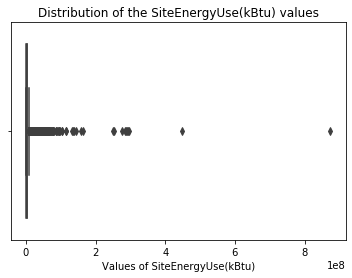

count    6.716000e+03
mean     2.617650e+05
std      3.699003e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.349435e+08
Name: SteamUse(kBtu), dtype: float64


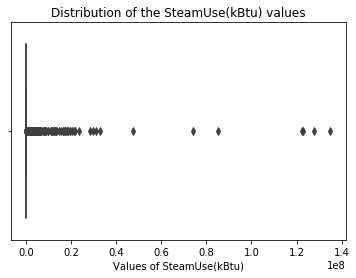

count    6.716000e+03
mean     3.580899e+06
std      1.247106e+07
min     -1.154170e+05
25%      6.350782e+05
50%      1.163338e+06
75%      2.782606e+06
max      6.570744e+08
Name: Electricity(kBtu), dtype: float64


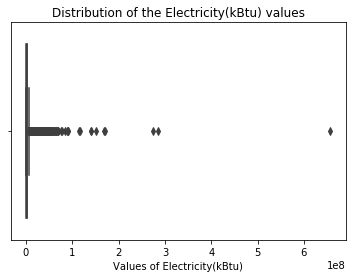

count    6.716000e+03
mean     1.307513e+06
std      5.678004e+06
min      0.000000e+00
25%      0.000000e+00
50%      3.004665e+05
75%      1.143626e+06
max      2.979090e+08
Name: NaturalGas(kBtu), dtype: float64


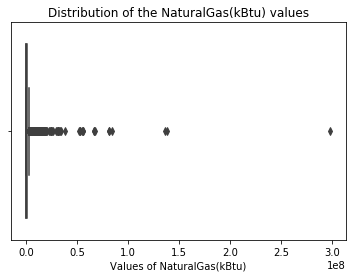

count     6716.000000
mean       114.610478
std        478.237575
min         -0.800000
25%          9.290000
50%         33.040000
75%         91.167500
max      16870.980000
Name: TotalGHGEmissions, dtype: float64


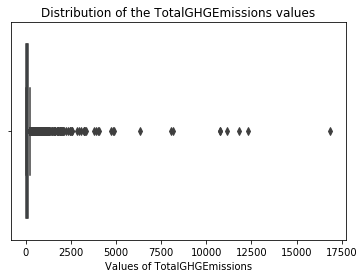

count    6716.000000
mean        1.078096
std         1.733259
min        -0.020000
25%         0.160000
50%         0.530000
75%         1.270000
max        34.090000
Name: GHGEmissionsIntensity, dtype: float64


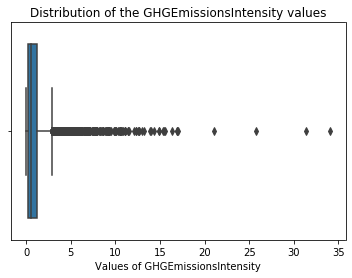

In [91]:
for count in numerical_data:
    input_data[count].fillna(0, inplace=True)
    input_data[count].replace('', 0, inplace=True)
    input_data[count]=input_data[count].astype(float)
    bx=sns.boxplot(x=input_data[count])
    #print("Distribution "+input_data[count].describe())
    print(input_data[count].describe())
    bx.set_title('Distribution of the '+count+' values')
    bx.set_xlabel('Values of '+count)
    plt.show()
    

Some results are odds:
- 'SourceEUI(kBtu/sf)' has negative values
- 'Electricity(kWh)' has negative values
- 'TotalGHGEmissions' has negative values
- 'GHGEmissionsIntensity' has negative values

######  Display the following columns SourceEUI, Electricity(kWh),TotalGHGEmissions, GHGEmissionsIntensity  with negative values

In [92]:
#input_data[['SourceEUI(kBtu/sf)']<0]
input_data.loc[(input_data['SourceEUI(kBtu/sf)']<0) | (input_data['Electricity(kBtu)']<0) | (input_data['TotalGHGEmissions']<0) | (input_data['GHGEmissionsIntensity']<0) ]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity,OtherFuelUse(kBtu),Seattle Police Department Micro Community Policing Plan Areas,SPD Beats,IsDuplicated,SameENERGYSTARScore,SameBuildingType,SamePrimaryPropertyType,SameNeighborhood,SameLargestPropertyUseType,SameSecondLargestPropertyUseType,SameThirdLargestPropertyUseType,SameComplianceStatus,IsSiteEUI(kBtu/sf),IsSourceEUI(kBtu/sf),IsSiteEnergyUse(kBtu),IsSteamUse(kBtu),IsElectricity(kBtu),IsNaturalGas(kBtu),IsTotalGHGEmissions,IsGHGEmissionsIntensity,IsOtherFuelUse(kBtu),ChangeENERGYSTARScore,ChangeBuildingType,ChangePrimaryPropertyType,ChangeNeighborhood,ChangeLargestPropertyUseType,ChangeSecondLargestPropertyUseType,ChangeThirdLargestPropertyUseType,ChangeComplianceStatus,LE_BuildingType,LE_Neighborhood,LE_PrimaryPropertyType,LE_LargestPropertyUseType,LE_SecondLargestPropertyUseType,LE_ThirdLargestPropertyUseType,OHE_BuildingType_0,OHE_BuildingType_1,OHE_BuildingType_2,OHE_BuildingType_3,OHE_BuildingType_4,OHE_BuildingType_5,OHE_BuildingType_6,OHE_BuildingType_7,OHE_Neighborhood_0,OHE_Neighborhood_1,OHE_Neighborhood_2,OHE_Neighborhood_3,OHE_Neighborhood_4,OHE_Neighborhood_5,OHE_Neighborhood_6,OHE_Neighborhood_7,OHE_Neighborhood_8,OHE_Neighborhood_9,OHE_Neighborhood_10,OHE_Neighborhood_11,OHE_Neighborhood_12,OHE_PrimaryPropertyType_0,OHE_PrimaryPropertyType_1,OHE_PrimaryPropertyType_2,OHE_PrimaryPropertyType_3,OHE_PrimaryPropertyType_4,OHE_PrimaryPropertyType_5,OHE_PrimaryPropertyType_6,OHE_PrimaryPropertyType_7,OHE_PrimaryPropertyType_8,OHE_PrimaryPropertyType_9,OHE_PrimaryPropertyType_10,OHE_PrimaryPropertyType_11,OHE_PrimaryPropertyType_12,OHE_PrimaryPropertyType_13,OHE_PrimaryPropertyType_14,OHE_PrimaryPropertyType_15,OHE_PrimaryPropertyType_16,OHE_PrimaryPropertyType_17,OHE_PrimaryPropertyType_18,OHE_PrimaryPropertyType_19,OHE_PrimaryPropertyType_20,OHE_PrimaryPropertyType_21,OHE_PrimaryPropertyType_22,OHE_LargestPropertyUseType_0,OHE_LargestPropertyUseType_1,OHE_LargestPropertyUseType_2,OHE_LargestPropertyUseType_3,OHE_LargestPropertyUseType_4,OHE_LargestPropertyUseType_5,OHE_LargestPropertyUseType_6,OHE_LargestPropertyUseType_7,OHE_LargestPropertyUseType_8,OHE_LargestPropertyUseType_9,OHE_LargestPropertyUseType_10,OHE_LargestPropertyUseType_11,OHE_LargestPropertyUseType_12,OHE_LargestPropertyUseType_13,OHE_LargestPropertyUseType_14,OHE_LargestPropertyUseType_15,OHE_LargestPropertyUseType_16,OHE_LargestPropertyUseType_17,OHE_LargestPropertyUseType_18,OHE_LargestPropertyUseType_19,OHE_LargestPropertyUseType_20,OHE_LargestPropertyUseType_21,OHE_LargestPropertyUseType_22,OHE_LargestPropertyUseType_23,OHE_LargestPropertyUseType_24,OHE_LargestPropertyUseType_25,OHE_LargestPropertyUseType_26,OHE_LargestPropertyUseType_27,OHE_LargestPropertyUseType_28,OHE_LargestPropertyUseType_29,OHE_LargestPropertyUseType_30,OHE_LargestPropertyUseType_31,OHE_LargestPropertyUseType_32,OHE_LargestPropertyUseType_33,OHE_LargestPropertyUseType_34,OHE_LargestPropertyUseType_35,OHE_LargestPropertyUseType_36,OHE_LargestPropertyUseType_37,OHE_LargestPropertyUseType_38,OHE_LargestPropertyUseType_39,OHE_LargestPropertyUseType_40,OHE_LargestPropertyUseType_41,OHE_LargestPropertyUseType_42,OHE_LargestPropertyUseType_43,OHE_LargestPropertyUseType_44,OHE_LargestPropertyUseType_45,OHE_LargestPropertyUseType_46,OHE_LargestPropertyUseType_47,OHE_LargestPropertyUseType_48,OHE_LargestPropertyUseType_49,OHE_LargestPropertyUseType_50,OHE_La

###### Display the last percentile of Electricity(kBtu) or  NaturalGas or SiteEnergyUse(kBtu)

In [93]:
input_data.loc[(input_data['Electricity(kBtu)']>=input_data['Electricity(kBtu)'].quantile(0.995))|(input_data['NaturalGas(kBtu)']>=input_data['NaturalGas(kBtu)'].quantile(0.995))|(input_data['SiteEnergyUse(kBtu)']>=input_data['SiteEnergyUse(kBtu)'].quantile(0.995))]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity,OtherFuelUse(kBtu),Seattle Police Department Micro Community Policing Plan Areas,SPD Beats,IsDuplicated,SameENERGYSTARScore,SameBuildingType,SamePrimaryPropertyType,SameNeighborhood,SameLargestPropertyUseType,SameSecondLargestPropertyUseType,SameThirdLargestPropertyUseType,SameComplianceStatus,IsSiteEUI(kBtu/sf),IsSourceEUI(kBtu/sf),IsSiteEnergyUse(kBtu),IsSteamUse(kBtu),IsElectricity(kBtu),IsNaturalGas(kBtu),IsTotalGHGEmissions,IsGHGEmissionsIntensity,IsOtherFuelUse(kBtu),ChangeENERGYSTARScore,ChangeBuildingType,ChangePrimaryPropertyType,ChangeNeighborhood,ChangeLargestPropertyUseType,ChangeSecondLargestPropertyUseType,ChangeThirdLargestPropertyUseType,ChangeComplianceStatus,LE_BuildingType,LE_Neighborhood,LE_PrimaryPropertyType,LE_LargestPropertyUseType,LE_SecondLargestPropertyUseType,LE_ThirdLargestPropertyUseType,OHE_BuildingType_0,OHE_BuildingType_1,OHE_BuildingType_2,OHE_BuildingType_3,OHE_BuildingType_4,OHE_BuildingType_5,OHE_BuildingType_6,OHE_BuildingType_7,OHE_Neighborhood_0,OHE_Neighborhood_1,OHE_Neighborhood_2,OHE_Neighborhood_3,OHE_Neighborhood_4,OHE_Neighborhood_5,OHE_Neighborhood_6,OHE_Neighborhood_7,OHE_Neighborhood_8,OHE_Neighborhood_9,OHE_Neighborhood_10,OHE_Neighborhood_11,OHE_Neighborhood_12,OHE_PrimaryPropertyType_0,OHE_PrimaryPropertyType_1,OHE_PrimaryPropertyType_2,OHE_PrimaryPropertyType_3,OHE_PrimaryPropertyType_4,OHE_PrimaryPropertyType_5,OHE_PrimaryPropertyType_6,OHE_PrimaryPropertyType_7,OHE_PrimaryPropertyType_8,OHE_PrimaryPropertyType_9,OHE_PrimaryPropertyType_10,OHE_PrimaryPropertyType_11,OHE_PrimaryPropertyType_12,OHE_PrimaryPropertyType_13,OHE_PrimaryPropertyType_14,OHE_PrimaryPropertyType_15,OHE_PrimaryPropertyType_16,OHE_PrimaryPropertyType_17,OHE_PrimaryPropertyType_18,OHE_PrimaryPropertyType_19,OHE_PrimaryPropertyType_20,OHE_PrimaryPropertyType_21,OHE_PrimaryPropertyType_22,OHE_LargestPropertyUseType_0,OHE_LargestPropertyUseType_1,OHE_LargestPropertyUseType_2,OHE_LargestPropertyUseType_3,OHE_LargestPropertyUseType_4,OHE_LargestPropertyUseType_5,OHE_LargestPropertyUseType_6,OHE_LargestPropertyUseType_7,OHE_LargestPropertyUseType_8,OHE_LargestPropertyUseType_9,OHE_LargestPropertyUseType_10,OHE_LargestPropertyUseType_11,OHE_LargestPropertyUseType_12,OHE_LargestPropertyUseType_13,OHE_LargestPropertyUseType_14,OHE_LargestPropertyUseType_15,OHE_LargestPropertyUseType_16,OHE_LargestPropertyUseType_17,OHE_LargestPropertyUseType_18,OHE_LargestPropertyUseType_19,OHE_LargestPropertyUseType_20,OHE_LargestPropertyUseType_21,OHE_LargestPropertyUseType_22,OHE_LargestPropertyUseType_23,OHE_LargestPropertyUseType_24,OHE_LargestPropertyUseType_25,OHE_LargestPropertyUseType_26,OHE_LargestPropertyUseType_27,OHE_LargestPropertyUseType_28,OHE_LargestPropertyUseType_29,OHE_LargestPropertyUseType_30,OHE_LargestPropertyUseType_31,OHE_LargestPropertyUseType_32,OHE_LargestPropertyUseType_33,OHE_LargestPropertyUseType_34,OHE_LargestPropertyUseType_35,OHE_LargestPropertyUseType_36,OHE_LargestPropertyUseType_37,OHE_LargestPropertyUseType_38,OHE_LargestPropertyUseType_39,OHE_LargestPropertyUseType_40,OHE_LargestPropertyUseType_41,OHE_LargestPropertyUseType_42,OHE_LargestPropertyUseType_43,OHE_LargestPropertyUseType_44,OHE_LargestPropertyUseType_45,OHE_LargestPropertyUseType_46,OHE_LargestPropertyUseType_47,OHE_LargestPropertyUseType_48,OHE_LargestPropertyUseType_49,OHE_LargestPropertyUseType_50,OHE_La

###### Add a new column Outlier that indicates if it is one

In [94]:
input_data.loc[(input_data['SourceEUI(kBtu/sf)']<0) | (input_data['Electricity(kBtu)']<0) | (input_data['TotalGHGEmissions']<0) | (input_data['GHGEmissionsIntensity']<0),'Outliers' ]=True
#input_data.loc[(input_data['Electricity(kBtu)']>=input_data['Electricity(kBtu)'].quantile(0.995))|(input_data['NaturalGas(kBtu)']>=input_data['NaturalGas(kBtu)'].quantile(0.995))|(input_data['SiteEnergyUse(kBtu)']>=input_data['SiteEnergyUse(kBtu)'].quantile(0.995))]=True

### Compute the percentage of change from 2015 to 2016 for the numerical data

In [95]:
numerical_data

['SiteEUI(kBtu/sf)',
 'SourceEUI(kBtu/sf)',
 'SiteEnergyUse(kBtu)',
 'SteamUse(kBtu)',
 'Electricity(kBtu)',
 'NaturalGas(kBtu)',
 'TotalGHGEmissions',
 'GHGEmissionsIntensity']

In [96]:
for count in numerical_data:
    print(count)
    input_data['per'+count]=input_data.sort_values('DataYear').groupby(['OSEBuildingID'])[count].pct_change()

SiteEUI(kBtu/sf)
SourceEUI(kBtu/sf)
SiteEnergyUse(kBtu)
SteamUse(kBtu)
Electricity(kBtu)
NaturalGas(kBtu)
TotalGHGEmissions
GHGEmissionsIntensity


In [97]:
input_data

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity,OtherFuelUse(kBtu),Seattle Police Department Micro Community Policing Plan Areas,SPD Beats,IsDuplicated,SameENERGYSTARScore,SameBuildingType,SamePrimaryPropertyType,SameNeighborhood,SameLargestPropertyUseType,SameSecondLargestPropertyUseType,SameThirdLargestPropertyUseType,SameComplianceStatus,IsSiteEUI(kBtu/sf),IsSourceEUI(kBtu/sf),IsSiteEnergyUse(kBtu),IsSteamUse(kBtu),IsElectricity(kBtu),IsNaturalGas(kBtu),IsTotalGHGEmissions,IsGHGEmissionsIntensity,IsOtherFuelUse(kBtu),ChangeENERGYSTARScore,ChangeBuildingType,ChangePrimaryPropertyType,ChangeNeighborhood,ChangeLargestPropertyUseType,ChangeSecondLargestPropertyUseType,ChangeThirdLargestPropertyUseType,ChangeComplianceStatus,LE_BuildingType,LE_Neighborhood,LE_PrimaryPropertyType,LE_LargestPropertyUseType,LE_SecondLargestPropertyUseType,LE_ThirdLargestPropertyUseType,OHE_BuildingType_0,OHE_BuildingType_1,OHE_BuildingType_2,OHE_BuildingType_3,OHE_BuildingType_4,OHE_BuildingType_5,OHE_BuildingType_6,OHE_BuildingType_7,OHE_Neighborhood_0,OHE_Neighborhood_1,OHE_Neighborhood_2,OHE_Neighborhood_3,OHE_Neighborhood_4,OHE_Neighborhood_5,OHE_Neighborhood_6,OHE_Neighborhood_7,OHE_Neighborhood_8,OHE_Neighborhood_9,OHE_Neighborhood_10,OHE_Neighborhood_11,OHE_Neighborhood_12,OHE_PrimaryPropertyType_0,OHE_PrimaryPropertyType_1,OHE_PrimaryPropertyType_2,OHE_PrimaryPropertyType_3,OHE_PrimaryPropertyType_4,OHE_PrimaryPropertyType_5,OHE_PrimaryPropertyType_6,OHE_PrimaryPropertyType_7,OHE_PrimaryPropertyType_8,OHE_PrimaryPropertyType_9,OHE_PrimaryPropertyType_10,OHE_PrimaryPropertyType_11,OHE_PrimaryPropertyType_12,OHE_PrimaryPropertyType_13,OHE_PrimaryPropertyType_14,OHE_PrimaryPropertyType_15,OHE_PrimaryPropertyType_16,OHE_PrimaryPropertyType_17,OHE_PrimaryPropertyType_18,OHE_PrimaryPropertyType_19,OHE_PrimaryPropertyType_20,OHE_PrimaryPropertyType_21,OHE_PrimaryPropertyType_22,OHE_LargestPropertyUseType_0,OHE_LargestPropertyUseType_1,OHE_LargestPropertyUseType_2,OHE_LargestPropertyUseType_3,OHE_LargestPropertyUseType_4,OHE_LargestPropertyUseType_5,OHE_LargestPropertyUseType_6,OHE_LargestPropertyUseType_7,OHE_LargestPropertyUseType_8,OHE_LargestPropertyUseType_9,OHE_LargestPropertyUseType_10,OHE_LargestPropertyUseType_11,OHE_LargestPropertyUseType_12,OHE_LargestPropertyUseType_13,OHE_LargestPropertyUseType_14,OHE_LargestPropertyUseType_15,OHE_LargestPropertyUseType_16,OHE_LargestPropertyUseType_17,OHE_LargestPropertyUseType_18,OHE_LargestPropertyUseType_19,OHE_LargestPropertyUseType_20,OHE_LargestPropertyUseType_21,OHE_LargestPropertyUseType_22,OHE_LargestPropertyUseType_23,OHE_LargestPropertyUseType_24,OHE_LargestPropertyUseType_25,OHE_LargestPropertyUseType_26,OHE_LargestPropertyUseType_27,OHE_LargestPropertyUseType_28,OHE_LargestPropertyUseType_29,OHE_LargestPropertyUseType_30,OHE_LargestPropertyUseType_31,OHE_LargestPropertyUseType_32,OHE_LargestPropertyUseType_33,OHE_LargestPropertyUseType_34,OHE_LargestPropertyUseType_35,OHE_LargestPropertyUseType_36,OHE_LargestPropertyUseType_37,OHE_LargestPropertyUseType_38,OHE_LargestPropertyUseType_39,OHE_LargestPropertyUseType_40,OHE_LargestPropertyUseType_41,OHE_LargestPropertyUseType_42,OHE_LargestPropertyUseType_43,OHE_LargestPropertyUseType_44,OHE_LargestPropertyUseType_45,OHE_LargestPropertyUseType_46,OHE_LargestPropertyUseType_47,OHE_LargestPropertyUseType_48,OHE_LargestPropertyUseType_49,OHE_LargestPropertyUseType_50,OHE_La

count    3282.000000
mean             inf
std              NaN
min         1.000000
25%         0.031639
50%         0.013288
75%         0.060775
max              inf
Name: perSiteEUI(kBtu/sf), dtype: float64


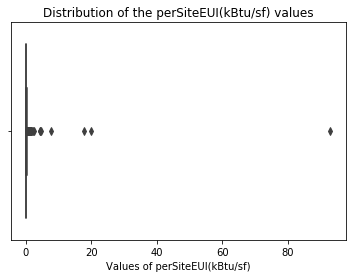

count    3282.000000
mean             inf
std              NaN
min         2.000000
25%         0.033038
50%         0.008840
75%         0.051803
max              inf
Name: perSourceEUI(kBtu/sf), dtype: float64


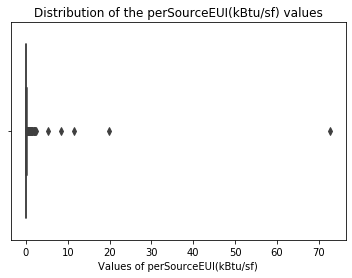

count    3282.000000
mean             inf
std              NaN
min         1.000000
25%         0.029119
50%         0.013183
75%         0.059384
max              inf
Name: perSiteEnergyUse(kBtu), dtype: float64


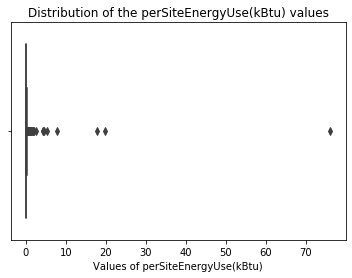

count    129.000000
mean            inf
std             NaN
min        1.000000
25%        0.078767
50%        0.050114
75%        0.136377
max             inf
Name: perSteamUse(kBtu), dtype: float64


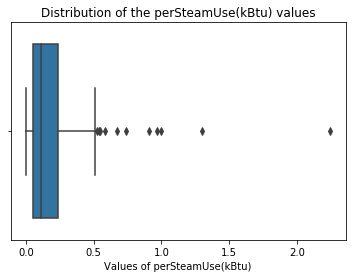

count    3283.000000
mean             inf
std              NaN
min         1.205185
25%         0.036815
50%         0.003977
75%         0.042998
max              inf
Name: perElectricity(kBtu), dtype: float64


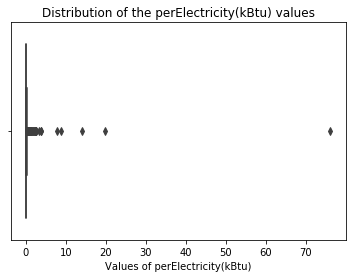

count    2072.000000
mean             inf
std              NaN
min         1.000000
25%         0.037659
50%         0.041251
75%         0.138733
max              inf
Name: perNaturalGas(kBtu), dtype: float64


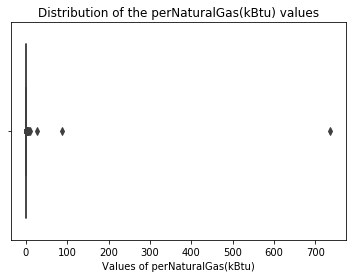

count    3283.000000
mean             inf
std              NaN
min         1.204082
25%         0.029706
50%         0.021407
75%         0.082537
max              inf
Name: perTotalGHGEmissions, dtype: float64


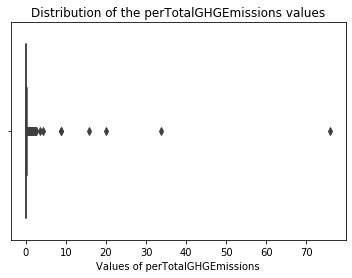

count    3281.000000
mean             inf
std              NaN
min         1.500000
25%         0.125000
50%         0.392857
75%         1.555556
max              inf
Name: perGHGEmissionsIntensity, dtype: float64


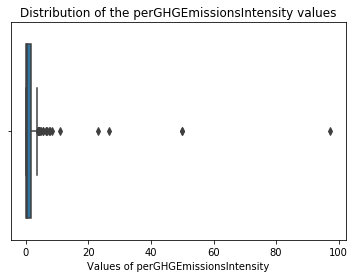

In [98]:
for count in numerical_data:


    bx=sns.boxplot(x=abs(input_data['per'+count]))

    print(abs(input_data['per'+count].describe()))
    bx.set_title('Distribution of the per'+count+' values')
    bx.set_xlabel('Values of per'+count)
    plt.show()

- perSiteEUI(kBtu/sf) > 10%,

### Display the outliers.

In [99]:
#input_data.loc[(input_data['perSourceEUI(kBtu/sf)']<0) | (input_data['Electricity(kBtu)']<0) | (input_data['TotalGHGEmissions']<0) | (input_data['GHGEmissionsIntensity']<0) ]
threshold=0.5
input_data.loc[(abs(input_data['perSiteEUI(kBtu/sf)'])>threshold)|(abs(input_data['perSourceEUI(kBtu/sf)'])>threshold)|(abs(input_data['perSiteEnergyUse(kBtu)'])>threshold)|(abs(input_data['perSteamUse(kBtu)'])>threshold) |(abs(input_data['perElectricity(kBtu)'])>threshold) |(abs(input_data['perNaturalGas(kBtu)'])>threshold) |(abs(input_data['perTotalGHGEmissions'])>threshold)|(abs(input_data['perGHGEmissionsIntensity'])>threshold) ]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity,OtherFuelUse(kBtu),Seattle Police Department Micro Community Policing Plan Areas,SPD Beats,IsDuplicated,SameENERGYSTARScore,SameBuildingType,SamePrimaryPropertyType,SameNeighborhood,SameLargestPropertyUseType,SameSecondLargestPropertyUseType,SameThirdLargestPropertyUseType,SameComplianceStatus,IsSiteEUI(kBtu/sf),IsSourceEUI(kBtu/sf),IsSiteEnergyUse(kBtu),IsSteamUse(kBtu),IsElectricity(kBtu),IsNaturalGas(kBtu),IsTotalGHGEmissions,IsGHGEmissionsIntensity,IsOtherFuelUse(kBtu),ChangeENERGYSTARScore,ChangeBuildingType,ChangePrimaryPropertyType,ChangeNeighborhood,ChangeLargestPropertyUseType,ChangeSecondLargestPropertyUseType,ChangeThirdLargestPropertyUseType,ChangeComplianceStatus,LE_BuildingType,LE_Neighborhood,LE_PrimaryPropertyType,LE_LargestPropertyUseType,LE_SecondLargestPropertyUseType,LE_ThirdLargestPropertyUseType,OHE_BuildingType_0,OHE_BuildingType_1,OHE_BuildingType_2,OHE_BuildingType_3,OHE_BuildingType_4,OHE_BuildingType_5,OHE_BuildingType_6,OHE_BuildingType_7,OHE_Neighborhood_0,OHE_Neighborhood_1,OHE_Neighborhood_2,OHE_Neighborhood_3,OHE_Neighborhood_4,OHE_Neighborhood_5,OHE_Neighborhood_6,OHE_Neighborhood_7,OHE_Neighborhood_8,OHE_Neighborhood_9,OHE_Neighborhood_10,OHE_Neighborhood_11,OHE_Neighborhood_12,OHE_PrimaryPropertyType_0,OHE_PrimaryPropertyType_1,OHE_PrimaryPropertyType_2,OHE_PrimaryPropertyType_3,OHE_PrimaryPropertyType_4,OHE_PrimaryPropertyType_5,OHE_PrimaryPropertyType_6,OHE_PrimaryPropertyType_7,OHE_PrimaryPropertyType_8,OHE_PrimaryPropertyType_9,OHE_PrimaryPropertyType_10,OHE_PrimaryPropertyType_11,OHE_PrimaryPropertyType_12,OHE_PrimaryPropertyType_13,OHE_PrimaryPropertyType_14,OHE_PrimaryPropertyType_15,OHE_PrimaryPropertyType_16,OHE_PrimaryPropertyType_17,OHE_PrimaryPropertyType_18,OHE_PrimaryPropertyType_19,OHE_PrimaryPropertyType_20,OHE_PrimaryPropertyType_21,OHE_PrimaryPropertyType_22,OHE_LargestPropertyUseType_0,OHE_LargestPropertyUseType_1,OHE_LargestPropertyUseType_2,OHE_LargestPropertyUseType_3,OHE_LargestPropertyUseType_4,OHE_LargestPropertyUseType_5,OHE_LargestPropertyUseType_6,OHE_LargestPropertyUseType_7,OHE_LargestPropertyUseType_8,OHE_LargestPropertyUseType_9,OHE_LargestPropertyUseType_10,OHE_LargestPropertyUseType_11,OHE_LargestPropertyUseType_12,OHE_LargestPropertyUseType_13,OHE_LargestPropertyUseType_14,OHE_LargestPropertyUseType_15,OHE_LargestPropertyUseType_16,OHE_LargestPropertyUseType_17,OHE_LargestPropertyUseType_18,OHE_LargestPropertyUseType_19,OHE_LargestPropertyUseType_20,OHE_LargestPropertyUseType_21,OHE_LargestPropertyUseType_22,OHE_LargestPropertyUseType_23,OHE_LargestPropertyUseType_24,OHE_LargestPropertyUseType_25,OHE_LargestPropertyUseType_26,OHE_LargestPropertyUseType_27,OHE_LargestPropertyUseType_28,OHE_LargestPropertyUseType_29,OHE_LargestPropertyUseType_30,OHE_LargestPropertyUseType_31,OHE_LargestPropertyUseType_32,OHE_LargestPropertyUseType_33,OHE_LargestPropertyUseType_34,OHE_LargestPropertyUseType_35,OHE_LargestPropertyUseType_36,OHE_LargestPropertyUseType_37,OHE_LargestPropertyUseType_38,OHE_LargestPropertyUseType_39,OHE_LargestPropertyUseType_40,OHE_LargestPropertyUseType_41,OHE_LargestPropertyUseType_42,OHE_LargestPropertyUseType_43,OHE_LargestPropertyUseType_44,OHE_LargestPropertyUseType_45,OHE_LargestPropertyUseType_46,OHE_LargestPropertyUseType_47,OHE_LargestPropertyUseType_48,OHE_LargestPropertyUseType_49,OHE_LargestPropertyUseType_50,OHE_La

In [100]:
#input_data.loc[(input_data['perSourceEUI(kBtu/sf)']<0) | (input_data['Electricity(kBtu)']<0) | (input_data['TotalGHGEmissions']<0) | (input_data['GHGEmissionsIntensity']<0) ]
threshold=0.7
input_data.loc[(abs(input_data['perSiteEnergyUse(kBtu)'])>threshold) |(abs(input_data['perTotalGHGEmissions'])>threshold) ]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity,OtherFuelUse(kBtu),Seattle Police Department Micro Community Policing Plan Areas,SPD Beats,IsDuplicated,SameENERGYSTARScore,SameBuildingType,SamePrimaryPropertyType,SameNeighborhood,SameLargestPropertyUseType,SameSecondLargestPropertyUseType,SameThirdLargestPropertyUseType,SameComplianceStatus,IsSiteEUI(kBtu/sf),IsSourceEUI(kBtu/sf),IsSiteEnergyUse(kBtu),IsSteamUse(kBtu),IsElectricity(kBtu),IsNaturalGas(kBtu),IsTotalGHGEmissions,IsGHGEmissionsIntensity,IsOtherFuelUse(kBtu),ChangeENERGYSTARScore,ChangeBuildingType,ChangePrimaryPropertyType,ChangeNeighborhood,ChangeLargestPropertyUseType,ChangeSecondLargestPropertyUseType,ChangeThirdLargestPropertyUseType,ChangeComplianceStatus,LE_BuildingType,LE_Neighborhood,LE_PrimaryPropertyType,LE_LargestPropertyUseType,LE_SecondLargestPropertyUseType,LE_ThirdLargestPropertyUseType,OHE_BuildingType_0,OHE_BuildingType_1,OHE_BuildingType_2,OHE_BuildingType_3,OHE_BuildingType_4,OHE_BuildingType_5,OHE_BuildingType_6,OHE_BuildingType_7,OHE_Neighborhood_0,OHE_Neighborhood_1,OHE_Neighborhood_2,OHE_Neighborhood_3,OHE_Neighborhood_4,OHE_Neighborhood_5,OHE_Neighborhood_6,OHE_Neighborhood_7,OHE_Neighborhood_8,OHE_Neighborhood_9,OHE_Neighborhood_10,OHE_Neighborhood_11,OHE_Neighborhood_12,OHE_PrimaryPropertyType_0,OHE_PrimaryPropertyType_1,OHE_PrimaryPropertyType_2,OHE_PrimaryPropertyType_3,OHE_PrimaryPropertyType_4,OHE_PrimaryPropertyType_5,OHE_PrimaryPropertyType_6,OHE_PrimaryPropertyType_7,OHE_PrimaryPropertyType_8,OHE_PrimaryPropertyType_9,OHE_PrimaryPropertyType_10,OHE_PrimaryPropertyType_11,OHE_PrimaryPropertyType_12,OHE_PrimaryPropertyType_13,OHE_PrimaryPropertyType_14,OHE_PrimaryPropertyType_15,OHE_PrimaryPropertyType_16,OHE_PrimaryPropertyType_17,OHE_PrimaryPropertyType_18,OHE_PrimaryPropertyType_19,OHE_PrimaryPropertyType_20,OHE_PrimaryPropertyType_21,OHE_PrimaryPropertyType_22,OHE_LargestPropertyUseType_0,OHE_LargestPropertyUseType_1,OHE_LargestPropertyUseType_2,OHE_LargestPropertyUseType_3,OHE_LargestPropertyUseType_4,OHE_LargestPropertyUseType_5,OHE_LargestPropertyUseType_6,OHE_LargestPropertyUseType_7,OHE_LargestPropertyUseType_8,OHE_LargestPropertyUseType_9,OHE_LargestPropertyUseType_10,OHE_LargestPropertyUseType_11,OHE_LargestPropertyUseType_12,OHE_LargestPropertyUseType_13,OHE_LargestPropertyUseType_14,OHE_LargestPropertyUseType_15,OHE_LargestPropertyUseType_16,OHE_LargestPropertyUseType_17,OHE_LargestPropertyUseType_18,OHE_LargestPropertyUseType_19,OHE_LargestPropertyUseType_20,OHE_LargestPropertyUseType_21,OHE_LargestPropertyUseType_22,OHE_LargestPropertyUseType_23,OHE_LargestPropertyUseType_24,OHE_LargestPropertyUseType_25,OHE_LargestPropertyUseType_26,OHE_LargestPropertyUseType_27,OHE_LargestPropertyUseType_28,OHE_LargestPropertyUseType_29,OHE_LargestPropertyUseType_30,OHE_LargestPropertyUseType_31,OHE_LargestPropertyUseType_32,OHE_LargestPropertyUseType_33,OHE_LargestPropertyUseType_34,OHE_LargestPropertyUseType_35,OHE_LargestPropertyUseType_36,OHE_LargestPropertyUseType_37,OHE_LargestPropertyUseType_38,OHE_LargestPropertyUseType_39,OHE_LargestPropertyUseType_40,OHE_LargestPropertyUseType_41,OHE_LargestPropertyUseType_42,OHE_LargestPropertyUseType_43,OHE_LargestPropertyUseType_44,OHE_LargestPropertyUseType_45,OHE_LargestPropertyUseType_46,OHE_LargestPropertyUseType_47,OHE_LargestPropertyUseType_48,OHE_LargestPropertyUseType_49,OHE_LargestPropertyUseType_50,OHE_La

###### Add a new column ChangeOutlier that indicates if it is one

In [101]:
input_data.loc[(abs(input_data['perSiteEnergyUse(kBtu)'])>threshold) |(abs(input_data['perTotalGHGEmissions'])>threshold),'ChangeOutliers' ]=True

In [102]:
input_data

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity,OtherFuelUse(kBtu),Seattle Police Department Micro Community Policing Plan Areas,SPD Beats,IsDuplicated,SameENERGYSTARScore,SameBuildingType,SamePrimaryPropertyType,SameNeighborhood,SameLargestPropertyUseType,SameSecondLargestPropertyUseType,SameThirdLargestPropertyUseType,SameComplianceStatus,IsSiteEUI(kBtu/sf),IsSourceEUI(kBtu/sf),IsSiteEnergyUse(kBtu),IsSteamUse(kBtu),IsElectricity(kBtu),IsNaturalGas(kBtu),IsTotalGHGEmissions,IsGHGEmissionsIntensity,IsOtherFuelUse(kBtu),ChangeENERGYSTARScore,ChangeBuildingType,ChangePrimaryPropertyType,ChangeNeighborhood,ChangeLargestPropertyUseType,ChangeSecondLargestPropertyUseType,ChangeThirdLargestPropertyUseType,ChangeComplianceStatus,LE_BuildingType,LE_Neighborhood,LE_PrimaryPropertyType,LE_LargestPropertyUseType,LE_SecondLargestPropertyUseType,LE_ThirdLargestPropertyUseType,OHE_BuildingType_0,OHE_BuildingType_1,OHE_BuildingType_2,OHE_BuildingType_3,OHE_BuildingType_4,OHE_BuildingType_5,OHE_BuildingType_6,OHE_BuildingType_7,OHE_Neighborhood_0,OHE_Neighborhood_1,OHE_Neighborhood_2,OHE_Neighborhood_3,OHE_Neighborhood_4,OHE_Neighborhood_5,OHE_Neighborhood_6,OHE_Neighborhood_7,OHE_Neighborhood_8,OHE_Neighborhood_9,OHE_Neighborhood_10,OHE_Neighborhood_11,OHE_Neighborhood_12,OHE_PrimaryPropertyType_0,OHE_PrimaryPropertyType_1,OHE_PrimaryPropertyType_2,OHE_PrimaryPropertyType_3,OHE_PrimaryPropertyType_4,OHE_PrimaryPropertyType_5,OHE_PrimaryPropertyType_6,OHE_PrimaryPropertyType_7,OHE_PrimaryPropertyType_8,OHE_PrimaryPropertyType_9,OHE_PrimaryPropertyType_10,OHE_PrimaryPropertyType_11,OHE_PrimaryPropertyType_12,OHE_PrimaryPropertyType_13,OHE_PrimaryPropertyType_14,OHE_PrimaryPropertyType_15,OHE_PrimaryPropertyType_16,OHE_PrimaryPropertyType_17,OHE_PrimaryPropertyType_18,OHE_PrimaryPropertyType_19,OHE_PrimaryPropertyType_20,OHE_PrimaryPropertyType_21,OHE_PrimaryPropertyType_22,OHE_LargestPropertyUseType_0,OHE_LargestPropertyUseType_1,OHE_LargestPropertyUseType_2,OHE_LargestPropertyUseType_3,OHE_LargestPropertyUseType_4,OHE_LargestPropertyUseType_5,OHE_LargestPropertyUseType_6,OHE_LargestPropertyUseType_7,OHE_LargestPropertyUseType_8,OHE_LargestPropertyUseType_9,OHE_LargestPropertyUseType_10,OHE_LargestPropertyUseType_11,OHE_LargestPropertyUseType_12,OHE_LargestPropertyUseType_13,OHE_LargestPropertyUseType_14,OHE_LargestPropertyUseType_15,OHE_LargestPropertyUseType_16,OHE_LargestPropertyUseType_17,OHE_LargestPropertyUseType_18,OHE_LargestPropertyUseType_19,OHE_LargestPropertyUseType_20,OHE_LargestPropertyUseType_21,OHE_LargestPropertyUseType_22,OHE_LargestPropertyUseType_23,OHE_LargestPropertyUseType_24,OHE_LargestPropertyUseType_25,OHE_LargestPropertyUseType_26,OHE_LargestPropertyUseType_27,OHE_LargestPropertyUseType_28,OHE_LargestPropertyUseType_29,OHE_LargestPropertyUseType_30,OHE_LargestPropertyUseType_31,OHE_LargestPropertyUseType_32,OHE_LargestPropertyUseType_33,OHE_LargestPropertyUseType_34,OHE_LargestPropertyUseType_35,OHE_LargestPropertyUseType_36,OHE_LargestPropertyUseType_37,OHE_LargestPropertyUseType_38,OHE_LargestPropertyUseType_39,OHE_LargestPropertyUseType_40,OHE_LargestPropertyUseType_41,OHE_LargestPropertyUseType_42,OHE_LargestPropertyUseType_43,OHE_LargestPropertyUseType_44,OHE_LargestPropertyUseType_45,OHE_LargestPropertyUseType_46,OHE_LargestPropertyUseType_47,OHE_LargestPropertyUseType_48,OHE_LargestPropertyUseType_49,OHE_LargestPropertyUseType_50,OHE_La

In [103]:
#Save the Dataframe in a CSV file
input_data.to_csv('./SmartData.csv', sep=',',header=True,quoting=csv.QUOTE_ALL, columns=input_data.columns.tolist(), index=False) 
